In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.transforms
%matplotlib inline

# Load SA results

In [2]:
df_p = pd.read_csv('SA_results_v7_p.csv')
df_n = pd.read_csv('SA_results_v7_n.csv')

df_p = df_p[['sentence', 'sentiment', 'strength']]
df_n = df_n[['sentence', 'sentiment', 'strength']]

In [3]:
print(len(df_p))
df_p.head(3)

151024


,sentence,sentiment,strength
0,when ordering i was unsure if the holder would...,positive,0.451169
1,very adaptable to all different location mounts.,positive,0.890246
2,"great product, great service.",positive,1.000000


In [4]:
print(len(df_n))
df_n.head(3)

27176


,sentence,sentiment,strength
0,miss leading add it's not useful\nfor anything,negative,0.788803
1,i thought it was a speaker but it's just a lit...,negative,0.963449
2,"love the size and good bass quality, but it do...",negative,0.886279


In [5]:
df_s = df_p.append(df_n)
len(df_s)

178200

# Merge with product features

In [6]:
df_f = pd.read_csv('FSP_without_st.csv')
df_f.drop(columns='Unnamed: 0', inplace=True)
df_f.rename(columns={'FSP':'feature', 'feature':'noun', 'sentiment':'adjective'}, inplace=True)

In [7]:
print(len(df_f))
df_f.head(3)

2269443


,cluster,price,product_name,sentence,feature,noun,adjective
0,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/i,i,unsure
1,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/holder,holder,unsure
2,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/jbl,jbl,unsure


In [8]:
df_fsp = df_f.merge(df_s, on='sentence')
print(len(df_fsp))
df_fsp.head(3)

1773004


,cluster,price,product_name,sentence,feature,noun,adjective,sentiment,strength
0,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/i,i,unsure,positive,0.451169
1,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/holder,holder,unsure,positive,0.451169
2,3,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...,unsure/jbl,jbl,unsure,positive,0.451169


In [9]:
# Clean uninformative features

bad_noun = ['i']
bad_adj = ['i']
df_fsp2 = df_fsp[(~df_fsp.noun.isin(bad_noun)) & (~df_fsp.adjective.isin(bad_adj))]

### Calculate average strength

In [10]:
df_avg = df_fsp2.groupby(['cluster', 'feature'])['strength'].mean().to_frame()
df_avg.head(3)

strength
cluster feature                     
0       'acurate/battery    0.085323
        'acurate/dot        0.085323
        'acurate/indicator  0.085323

In [11]:
df_fsp3 = df_fsp2.merge(df_avg, on=['cluster', 'feature'])
df_fsp3.drop(columns='strength_x', inplace=True)
df_fsp3.rename(columns={'strength_y': 'strength'}, inplace=True)
df_fsp3[['cluster', 'feature', 'sentiment', 'strength', 
        'price', 'product_name', 'sentence']]

,cluster,feature,sentiment,strength,price,product_name,sentence
0,3,unsure/holder,positive,0.451169,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...
1,3,unsure/jbl,positive,0.451169,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...
2,3,unsure/speaker,positive,0.734731,7.99,ZOEA Portable Bluetooth Speaker Mount for Golf...,when ordering i was unsure if the holder would...
3,3,unsure/speaker,positive,0.734731,18.29,Portable Waterproof Bluetooth Speaker with FM ...,"so, i was a bit unsure if this speaker would h..."
4,3,unsure/speaker,positive,0.734731,34.99,iFox iF012 Bluetooth Shower Speaker - Certifie...,if you're unsure which waterproof/resistant bl...
...,...,...,...,...,...,...,...
1571406,4,nice/analog,positive,0.817046,499.00,Vifa Oslo Compact Rechargeable Hi-Resolution B...,"still, the price is a bit offset by the build ..."
1571407,4,nice/tote,positive,0.817046,499.00,Vifa Oslo Compact Rechargeable Hi-Resolution B...,"still, the price is a bit offset by the build ..."
1571408,4,nice/bag,positive,0.817046,499.00,Vifa Oslo Compact Rechargeable Hi-Resolution B...,"still, the price is a bit offset by the build ..."
1571409,4,nice/power,positive,0.817046,499.00,Vifa Oslo Compact Rechargeable Hi-Resolution B...,"still, the price is a bit offset by the build ..."


In [12]:
#df_fsp4 = df_fsp3[['cluster', 'feature', 'sentiment', 'strength', 'price', 'product_name', 'sentence']]
#df_fsp4.to_csv('final_product.csv')

### Correct cluster index

In [13]:
print(df_fsp3[df_fsp3.cluster == 0]['price'].head(1)) #c2
print(df_fsp3[df_fsp3.cluster == 1]['price'].head(1)) #c4
print(df_fsp3[df_fsp3.cluster == 2]['price'].head(1)) #c3
print(df_fsp3[df_fsp3.cluster == 3]['price'].head(1)) #c1
print(df_fsp3[df_fsp3.cluster == 4]['price'].head(1)) #c5

94621    49.99
Name: price, dtype: float64
86704    210.0
Name: price, dtype: float64
95977    99.99
Name: price, dtype: float64
0    7.99
Name: price, dtype: float64
97076    398.0
Name: price, dtype: float64


In [14]:
df_fsp3.loc[df_fsp3.cluster == 0, 'cluster'] = 'c2'
df_fsp3.loc[df_fsp3.cluster == 1, 'cluster'] = 'c4'
df_fsp3.loc[df_fsp3.cluster == 2, 'cluster'] = 'c3'
df_fsp3.loc[df_fsp3.cluster == 3, 'cluster'] = 'c1'
df_fsp3.loc[df_fsp3.cluster == 4, 'cluster'] = 'c5'

# Weight FSP

### Split by Sentiment

In [15]:
df_fsp_p = df_fsp3[df_fsp3.sentiment == 'positive']
df_fsp_n = df_fsp3[df_fsp3.sentiment == 'negative']

In [16]:
# Clean uninformative features

bad_noun_p = ['speaker', 'der', 'product', '*', 't']
bad_adj_p = ['sound', 'easy', 'sonos', 'alexa']
df_fsp_p2 = df_fsp_p[(~df_fsp_p.noun.isin(bad_noun_p)) & (~df_fsp_p.adjective.isin(bad_adj_p))]

bad_noun_n = ['t', 'speaker', 'product', 'b', 'bose', 'p6', 'o', 'kilburn', 'jambox', 'flip',
              'alexa', 'pdf', '*', '’', '..']
bad_adj_n = ['bose', 'first', 'last', 'able', 'next', 'sound', 'wifi', 'other',
             'good', 'sonos', '’', 'new', 'full', 'great', 'many', 'much', 'google',
             'alexa', 'doesn', '“', 'usb', 'second', 'few', 'more', 'sure', 'loud',
             'ue', 'better', '64-bit', 'ac', 'altec', 'ich', 't', 'serial', 'treble',
             'nicht', 'es', 'only', 'smart', 'sleep', 'aux', 'nice', 'sd', 'blue', 'whole', 
             'high']
df_fsp_n2 = df_fsp_n[(~df_fsp_n.noun.isin(bad_noun_n)) & (~df_fsp_n.adjective.isin(bad_adj_n))]

### Split by Clusters

In [17]:
df_pc1 = df_fsp_p2[df_fsp_p2.cluster == 'c1']
df_pc2 = df_fsp_p2[df_fsp_p2.cluster == 'c2']
df_pc3 = df_fsp_p2[df_fsp_p2.cluster == 'c3']
df_pc4 = df_fsp_p2[df_fsp_p2.cluster == 'c4']
df_pc5 = df_fsp_p2[df_fsp_p2.cluster == 'c5']

df_nc1 = df_fsp_n2[df_fsp_n2.cluster == 'c1']
df_nc2 = df_fsp_n2[df_fsp_n2.cluster == 'c2']
df_nc3 = df_fsp_n2[df_fsp_n2.cluster == 'c3']
df_nc4 = df_fsp_n2[df_fsp_n2.cluster == 'c4']
df_nc5 = df_fsp_n2[df_fsp_n2.cluster == 'c5']

In [18]:
import warnings
warnings.filterwarnings('ignore')

df_pc1['frequency'] = df_pc1.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)
df_pc2['frequency'] = df_pc2.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)
df_pc3['frequency'] = df_pc3.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)
df_pc4['frequency'] = df_pc4.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)
df_pc5['frequency'] = df_pc5.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)

df_nc1['frequency'] = df_nc1.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)
df_nc2['frequency'] = df_nc2.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)
df_nc3['frequency'] = df_nc3.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)
df_nc4['frequency'] = df_nc4.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)
df_nc5['frequency'] = df_nc5.groupby('feature')['feature'].transform('count').div(len(df_pc1)).round(6)

In [19]:
df_pc1_top = df_pc1.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]
df_pc2_top = df_pc2.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]
df_pc3_top = df_pc3.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]
df_pc4_top = df_pc4.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]
df_pc5_top = df_pc5.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]

df_nc1_top = df_nc1.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]
df_nc2_top = df_nc2.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]
df_nc3_top = df_nc3.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]
df_nc4_top = df_nc4.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]
df_nc5_top = df_nc5.sort_values(by='frequency', ascending=False).drop_duplicates(subset='feature')[['feature', 'frequency', 'strength']][:20]

In [20]:
# Sort by Frequency
df_pc1_top.sort_values(by='frequency', ascending=False, inplace=True)
df_pc2_top.sort_values(by='frequency', ascending=False, inplace=True)
df_pc3_top.sort_values(by='frequency', ascending=False, inplace=True)
df_pc4_top.sort_values(by='frequency', ascending=False, inplace=True)
df_pc5_top.sort_values(by='frequency', ascending=False, inplace=True)

df_nc1_top.sort_values(by='frequency', ascending=False, inplace=True)
df_nc2_top.sort_values(by='frequency', ascending=False, inplace=True)
df_nc3_top.sort_values(by='frequency', ascending=False, inplace=True)
df_nc4_top.sort_values(by='frequency', ascending=False, inplace=True)
df_nc5_top.sort_values(by='frequency', ascending=False, inplace=True)

In [21]:
# Reset index
df_pc1_top.reset_index(drop=True, inplace=True)
df_pc2_top.reset_index(drop=True, inplace=True)
df_pc3_top.reset_index(drop=True, inplace=True)
df_pc4_top.reset_index(drop=True, inplace=True)
df_pc5_top.reset_index(drop=True, inplace=True)

df_nc1_top.reset_index(drop=True, inplace=True)
df_nc2_top.reset_index(drop=True, inplace=True)
df_nc3_top.reset_index(drop=True, inplace=True)
df_nc4_top.reset_index(drop=True, inplace=True)
df_nc5_top.reset_index(drop=True, inplace=True)

In [22]:
# Add Ranking Column
df_pc1_top['ranking'] = df_pc1_top['frequency'].rank(ascending=False)
df_pc2_top['ranking'] = df_pc2_top['frequency'].rank(ascending=False)
df_pc3_top['ranking'] = df_pc3_top['frequency'].rank(ascending=False)
df_pc4_top['ranking'] = df_pc4_top['frequency'].rank(ascending=False)
df_pc5_top['ranking'] = df_pc5_top['frequency'].rank(ascending=False)

df_nc1_top['ranking'] = df_nc1_top['frequency'].rank(ascending=False)
df_nc2_top['ranking'] = df_nc2_top['frequency'].rank(ascending=False)
df_nc3_top['ranking'] = df_nc3_top['frequency'].rank(ascending=False)
df_nc4_top['ranking'] = df_nc4_top['frequency'].rank(ascending=False)
df_nc5_top['ranking'] = df_nc5_top['frequency'].rank(ascending=False)

### Distribution of Frequency

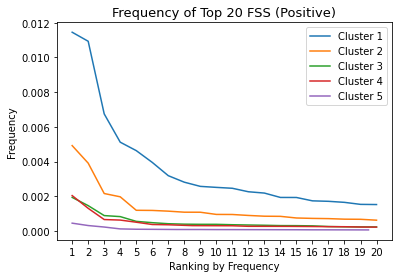

In [23]:
plt.figure()

plt.plot(df_pc1_top['ranking'], df_pc1_top['frequency'], label='Cluster 1')
plt.plot(df_pc2_top['ranking'], df_pc2_top['frequency'], label='Cluster 2')
plt.plot(df_pc3_top['ranking'], df_pc3_top['frequency'], label='Cluster 3')
plt.plot(df_pc4_top['ranking'], df_pc4_top['frequency'], label='Cluster 4')
plt.plot(df_pc5_top['ranking'], df_pc5_top['frequency'], label='Cluster 5')

plt.xlabel('Ranking by Frequency')
plt.xticks(np.arange(1,21,1))
plt.ylabel('Frequency')
plt.title('Frequency of Top 20 FSS (Positive)', fontsize=13)
plt.legend()
plt.savefig("frequency_p.png", format="png", dpi=300, bbox_inches = "tight")
plt.show()

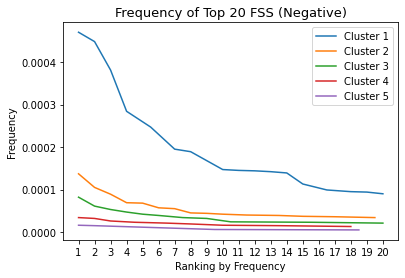

In [24]:
plt.figure()

plt.plot(df_nc1_top['ranking'], df_nc1_top['frequency'], label='Cluster 1')
plt.plot(df_nc2_top['ranking'], df_nc2_top['frequency'], label='Cluster 2')
plt.plot(df_nc3_top['ranking'], df_nc3_top['frequency'], label='Cluster 3')
plt.plot(df_nc4_top['ranking'], df_nc4_top['frequency'], label='Cluster 4')
plt.plot(df_nc5_top['ranking'], df_nc5_top['frequency'], label='Cluster 5')

plt.xlabel('Ranking by Frequency')
plt.xticks(np.arange(1,21,1))
plt.ylabel('Frequency')
plt.title('Frequency of Top 20 FSS (Negative)', fontsize=13)
plt.legend()
plt.savefig("frequency_n.png", format="png", dpi=300, bbox_inches = "tight")
plt.show()

# Create Tables for Importance Martix

In [28]:
figs = [df_pc1_top, df_pc2_top, df_pc3_top, df_pc4_top, df_pc5_top,
        df_nc1_top, df_nc2_top, df_nc3_top, df_nc4_top, df_nc5_top]

In [29]:
df_top_p = pd.concat([df_pc1_top, df_pc2_top, df_pc3_top, df_pc4_top, df_pc5_top], axis=1)
df_top_p.drop(columns='ranking', inplace=True)
df_top_n = pd.concat([df_nc1_top, df_nc2_top, df_nc3_top, df_nc4_top, df_nc5_top], axis=1)
df_top_n.drop(columns='ranking', inplace=True)

df_top_p.to_csv('top_fss_p.csv')
df_top_n.to_csv('top_fss_n.csv')

# Plot figures

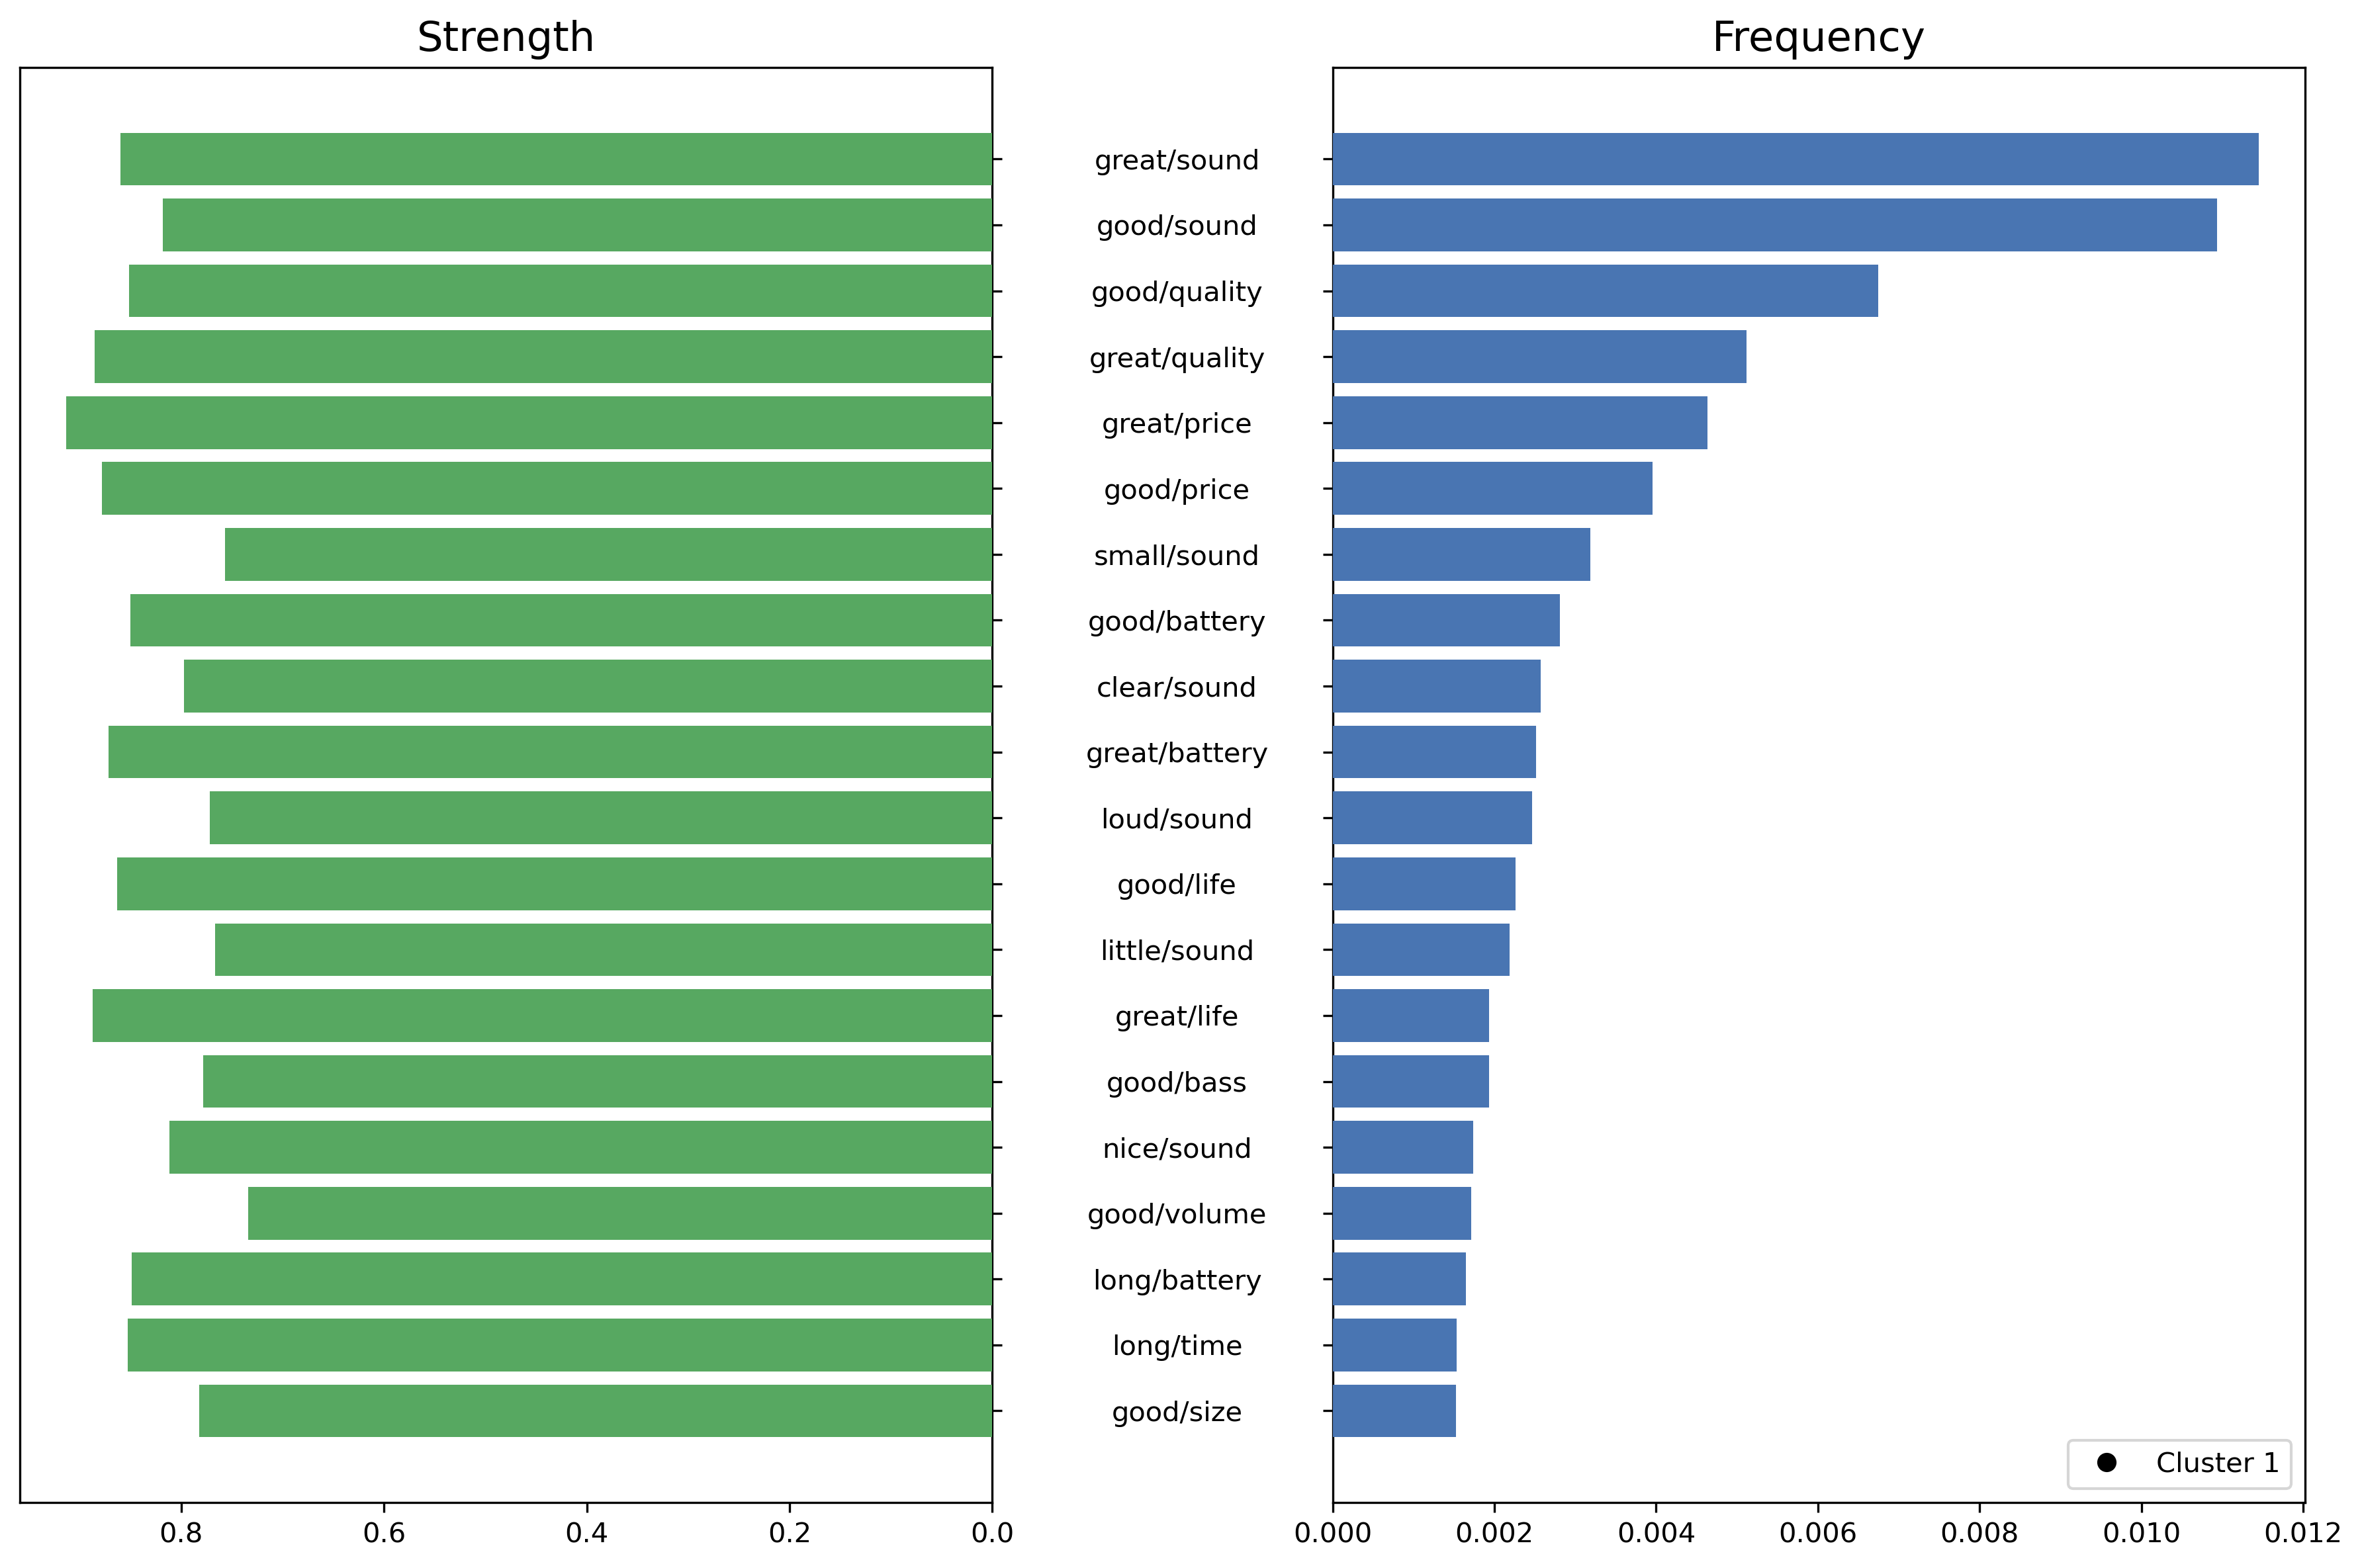

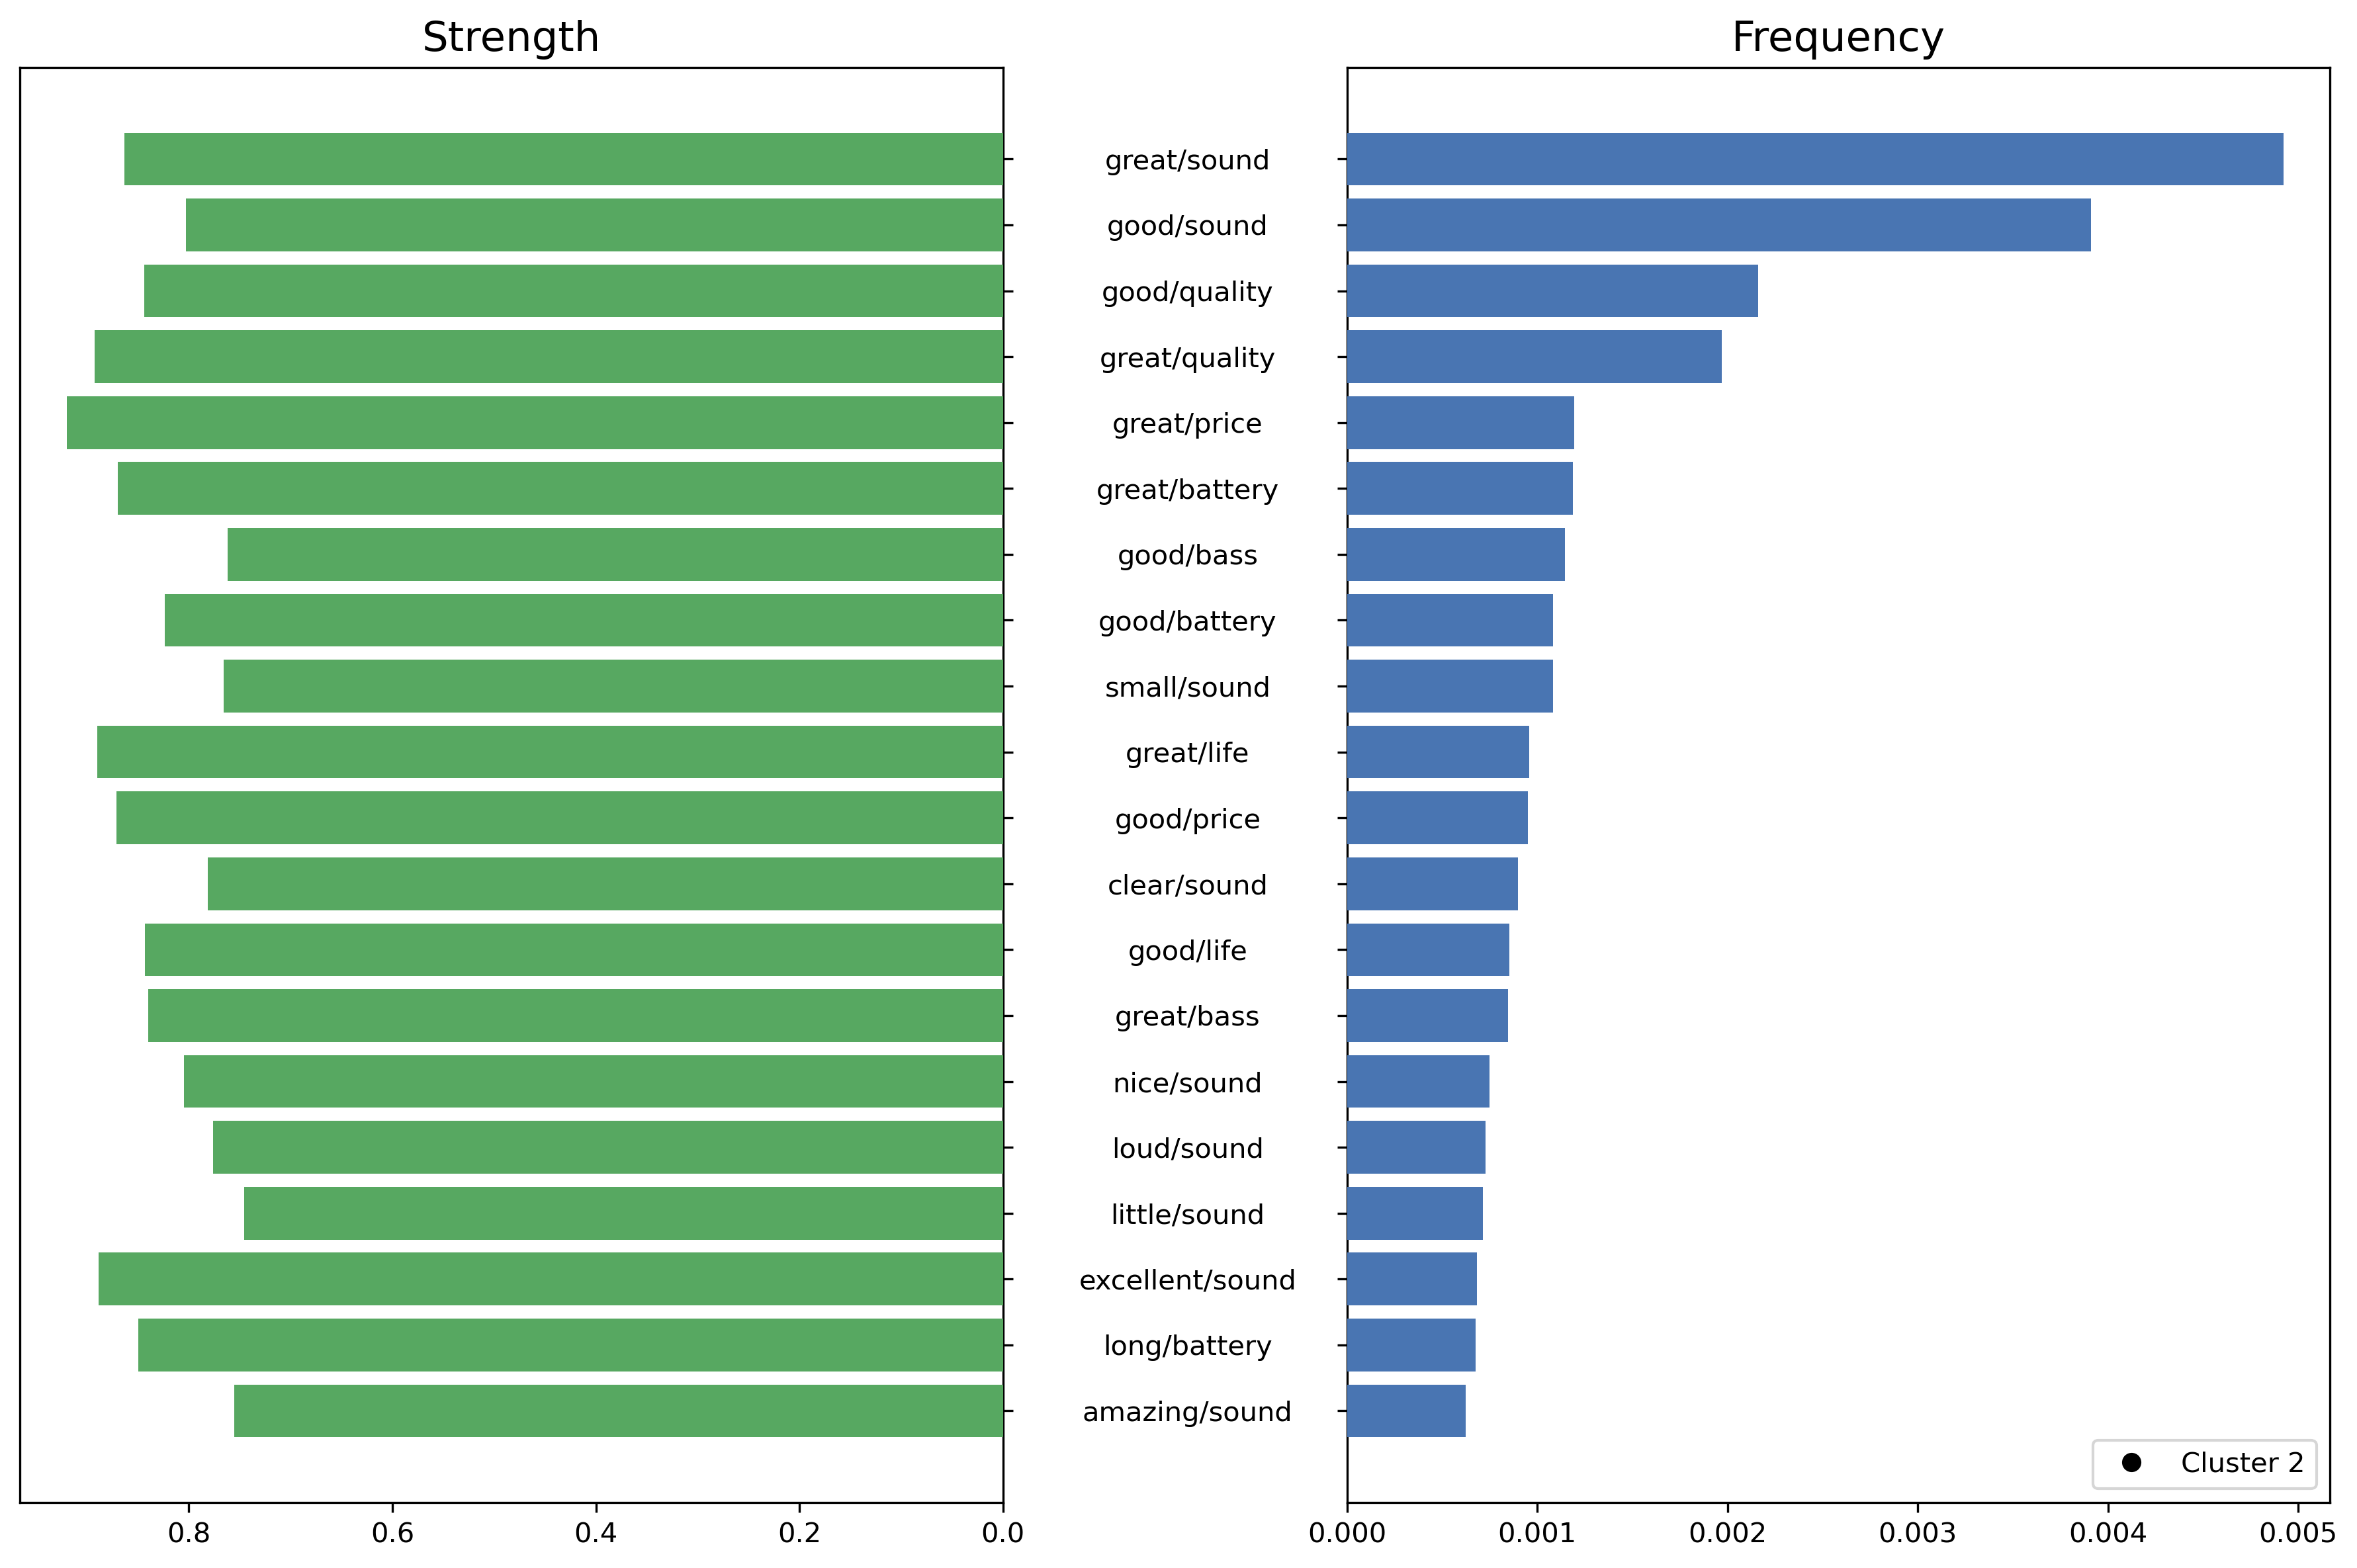

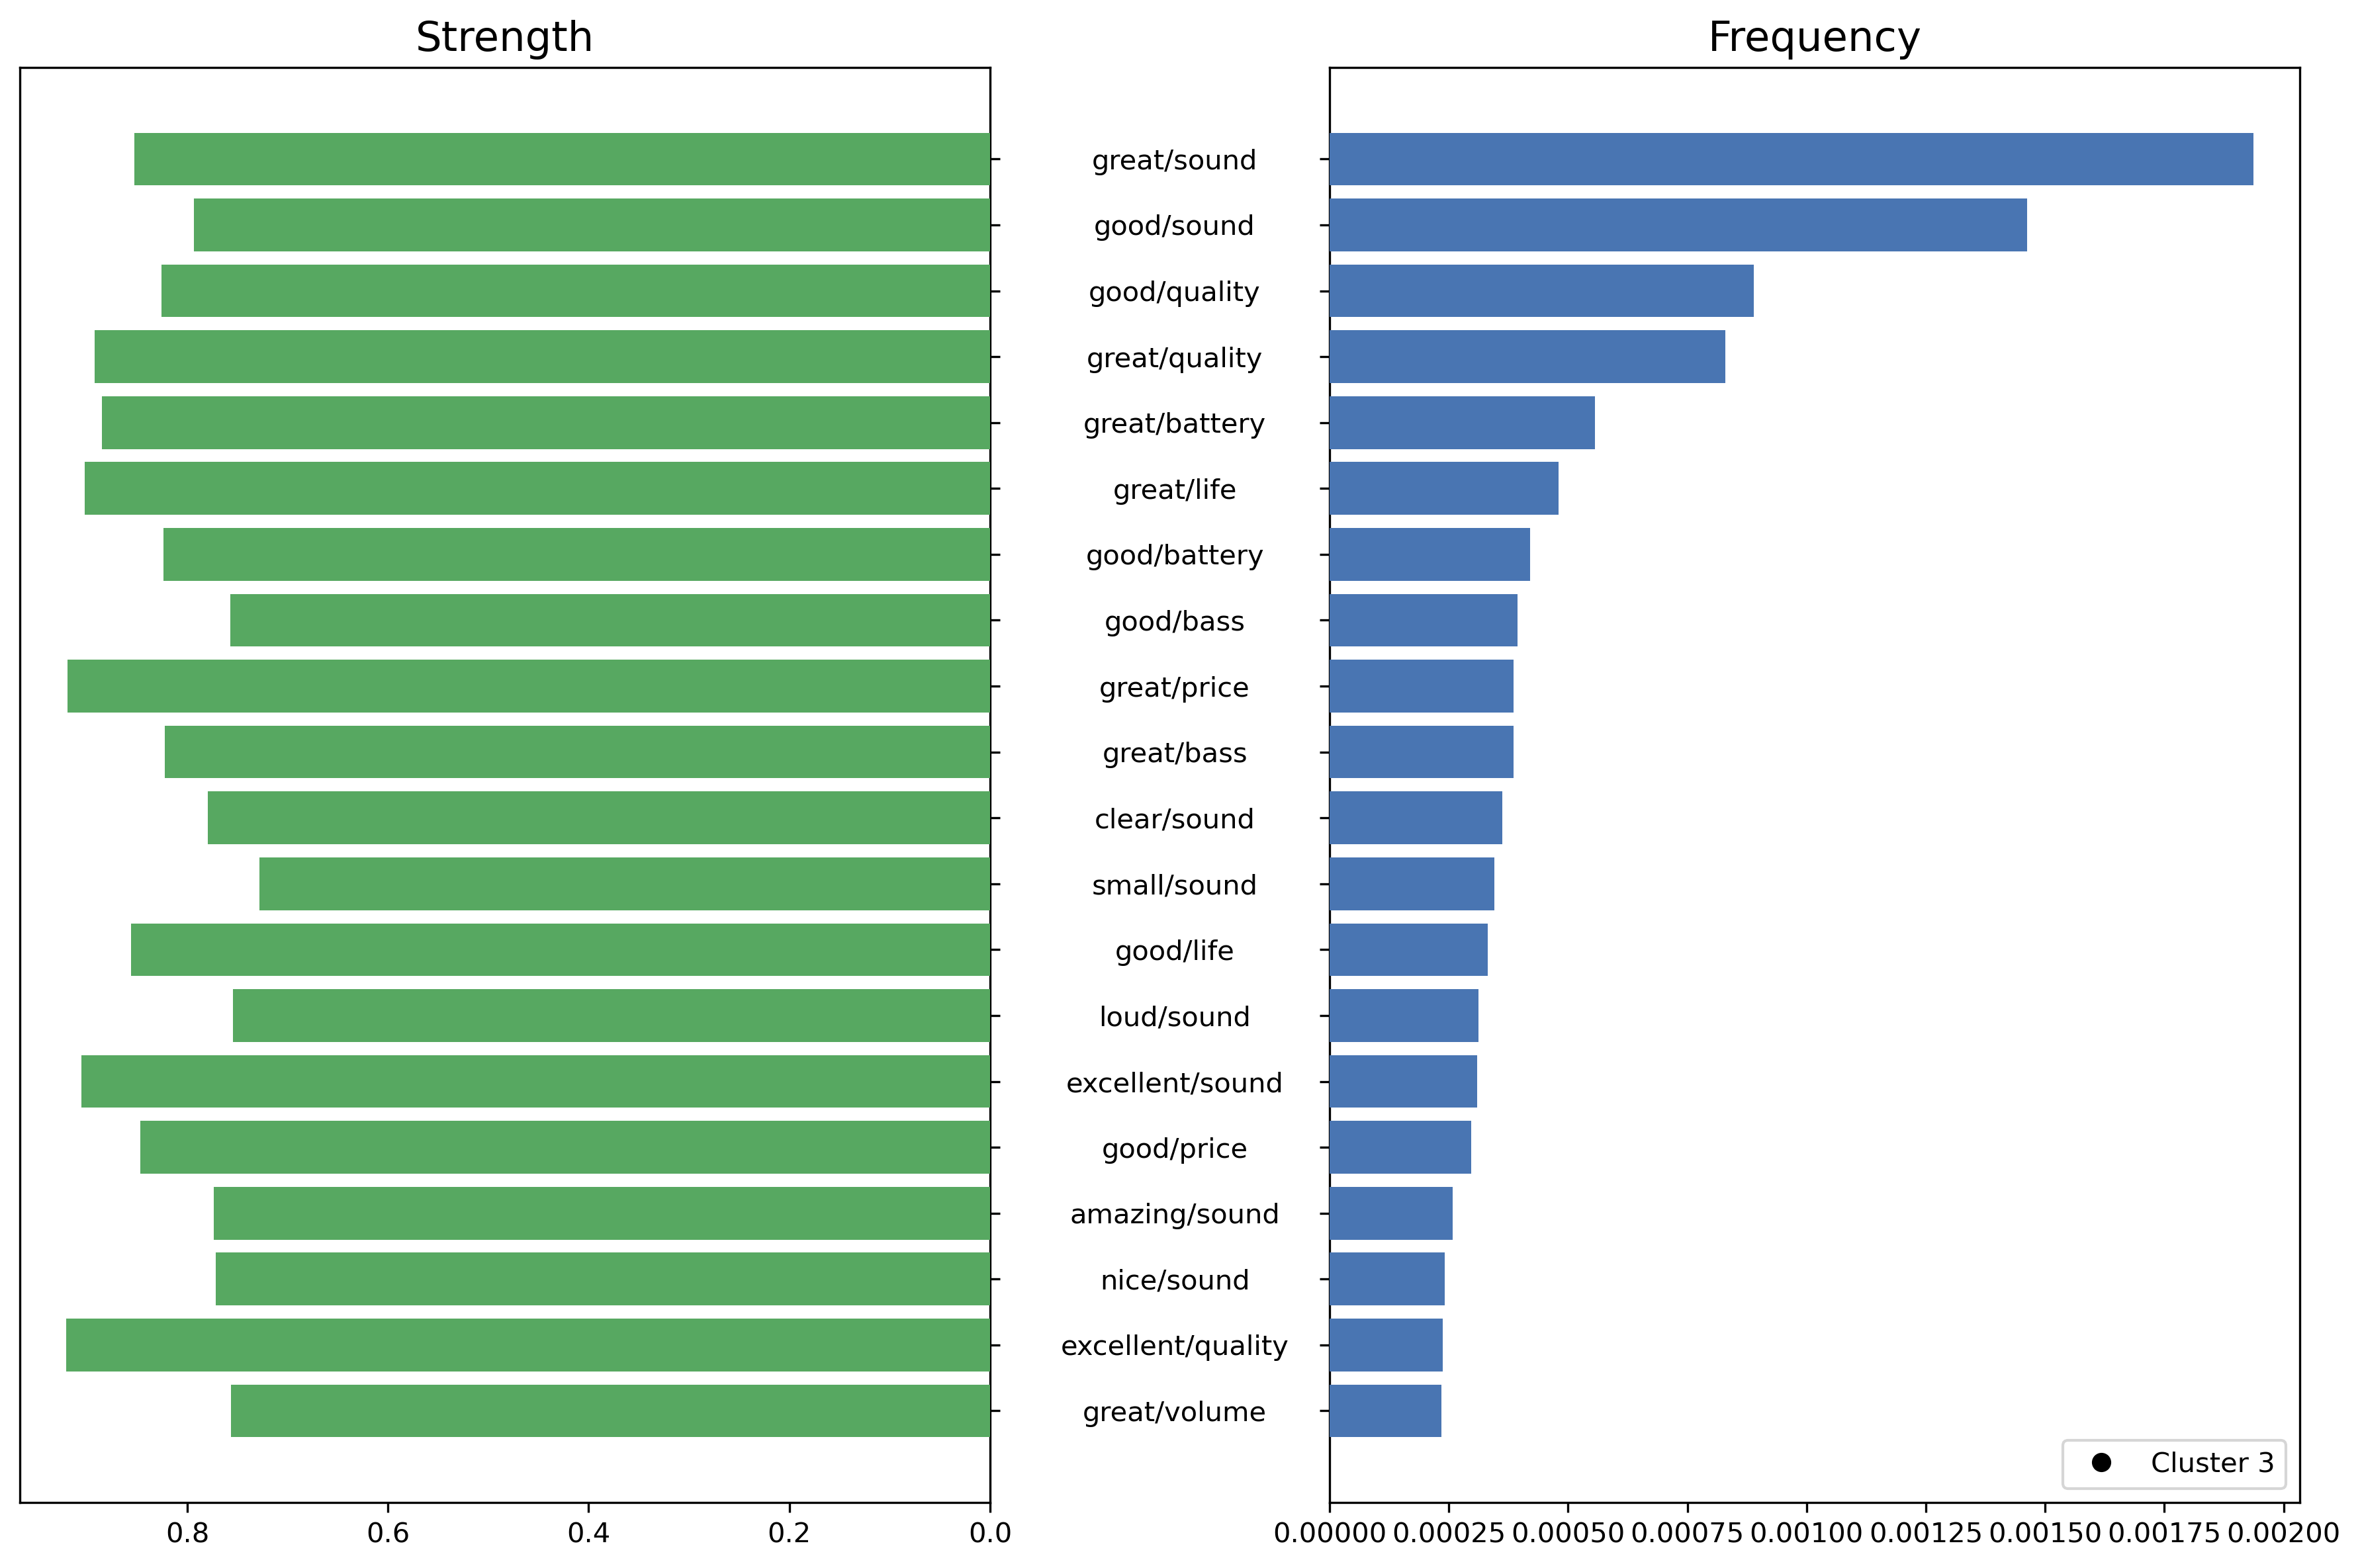

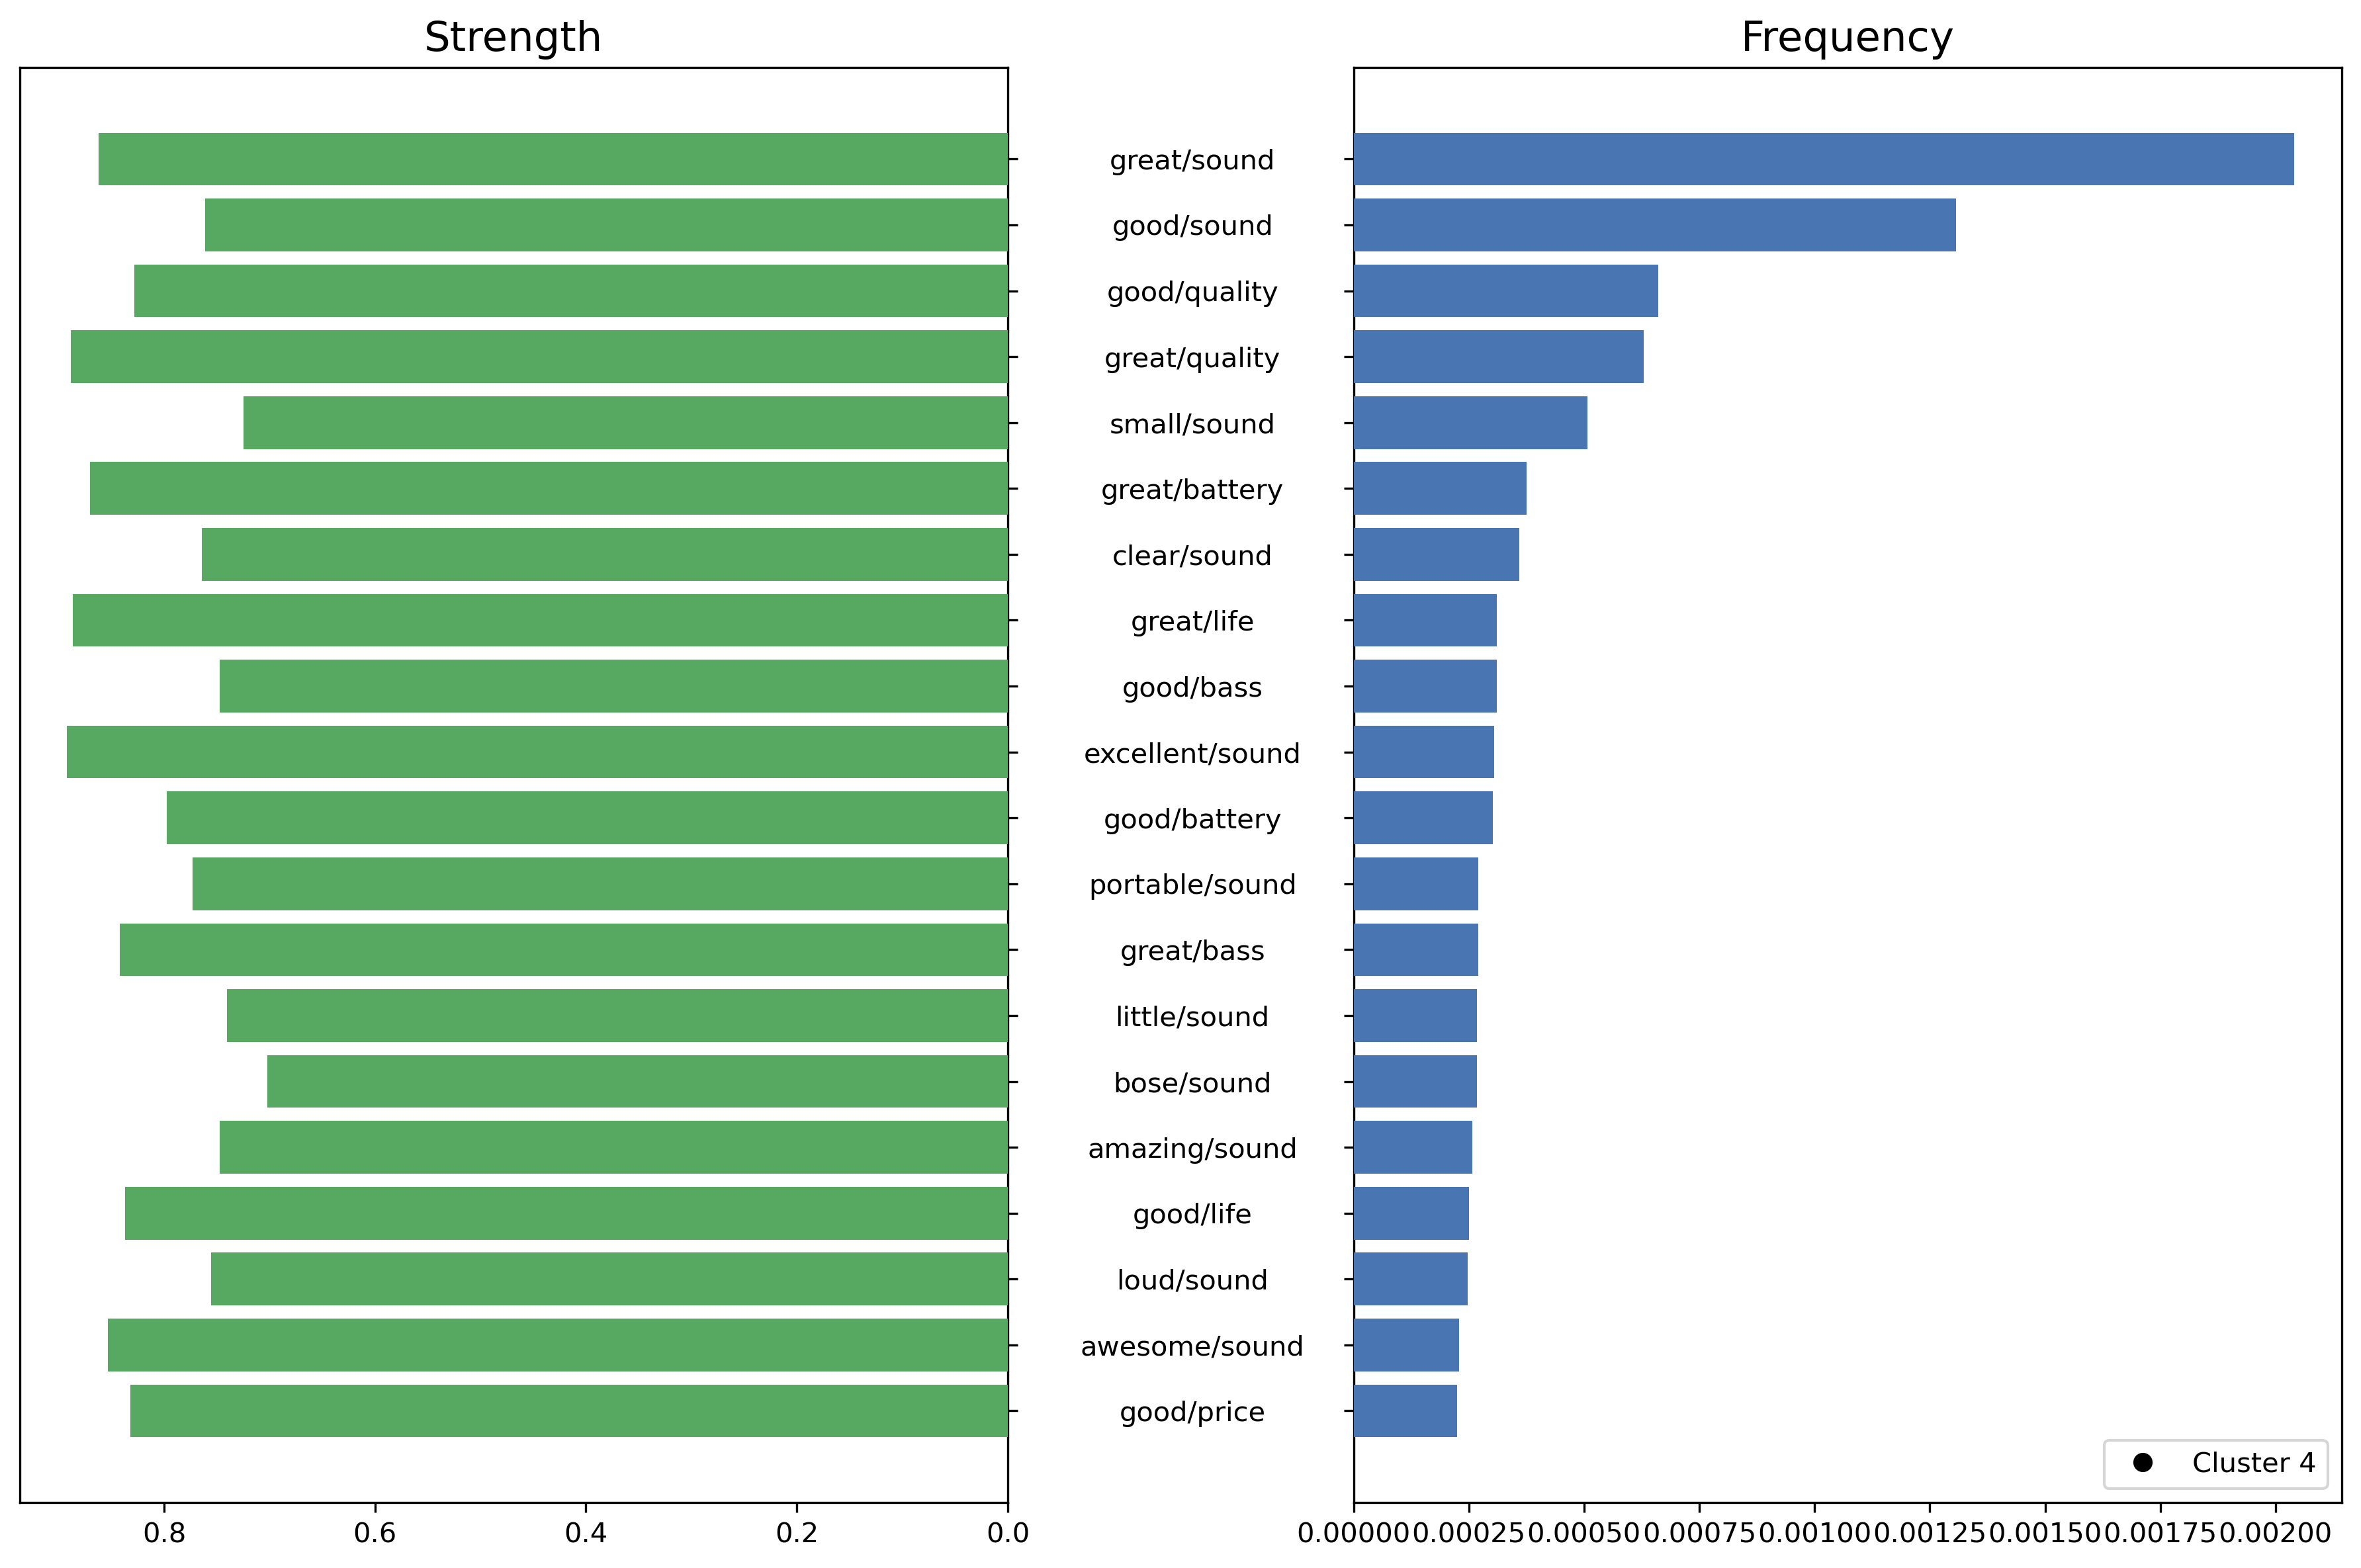

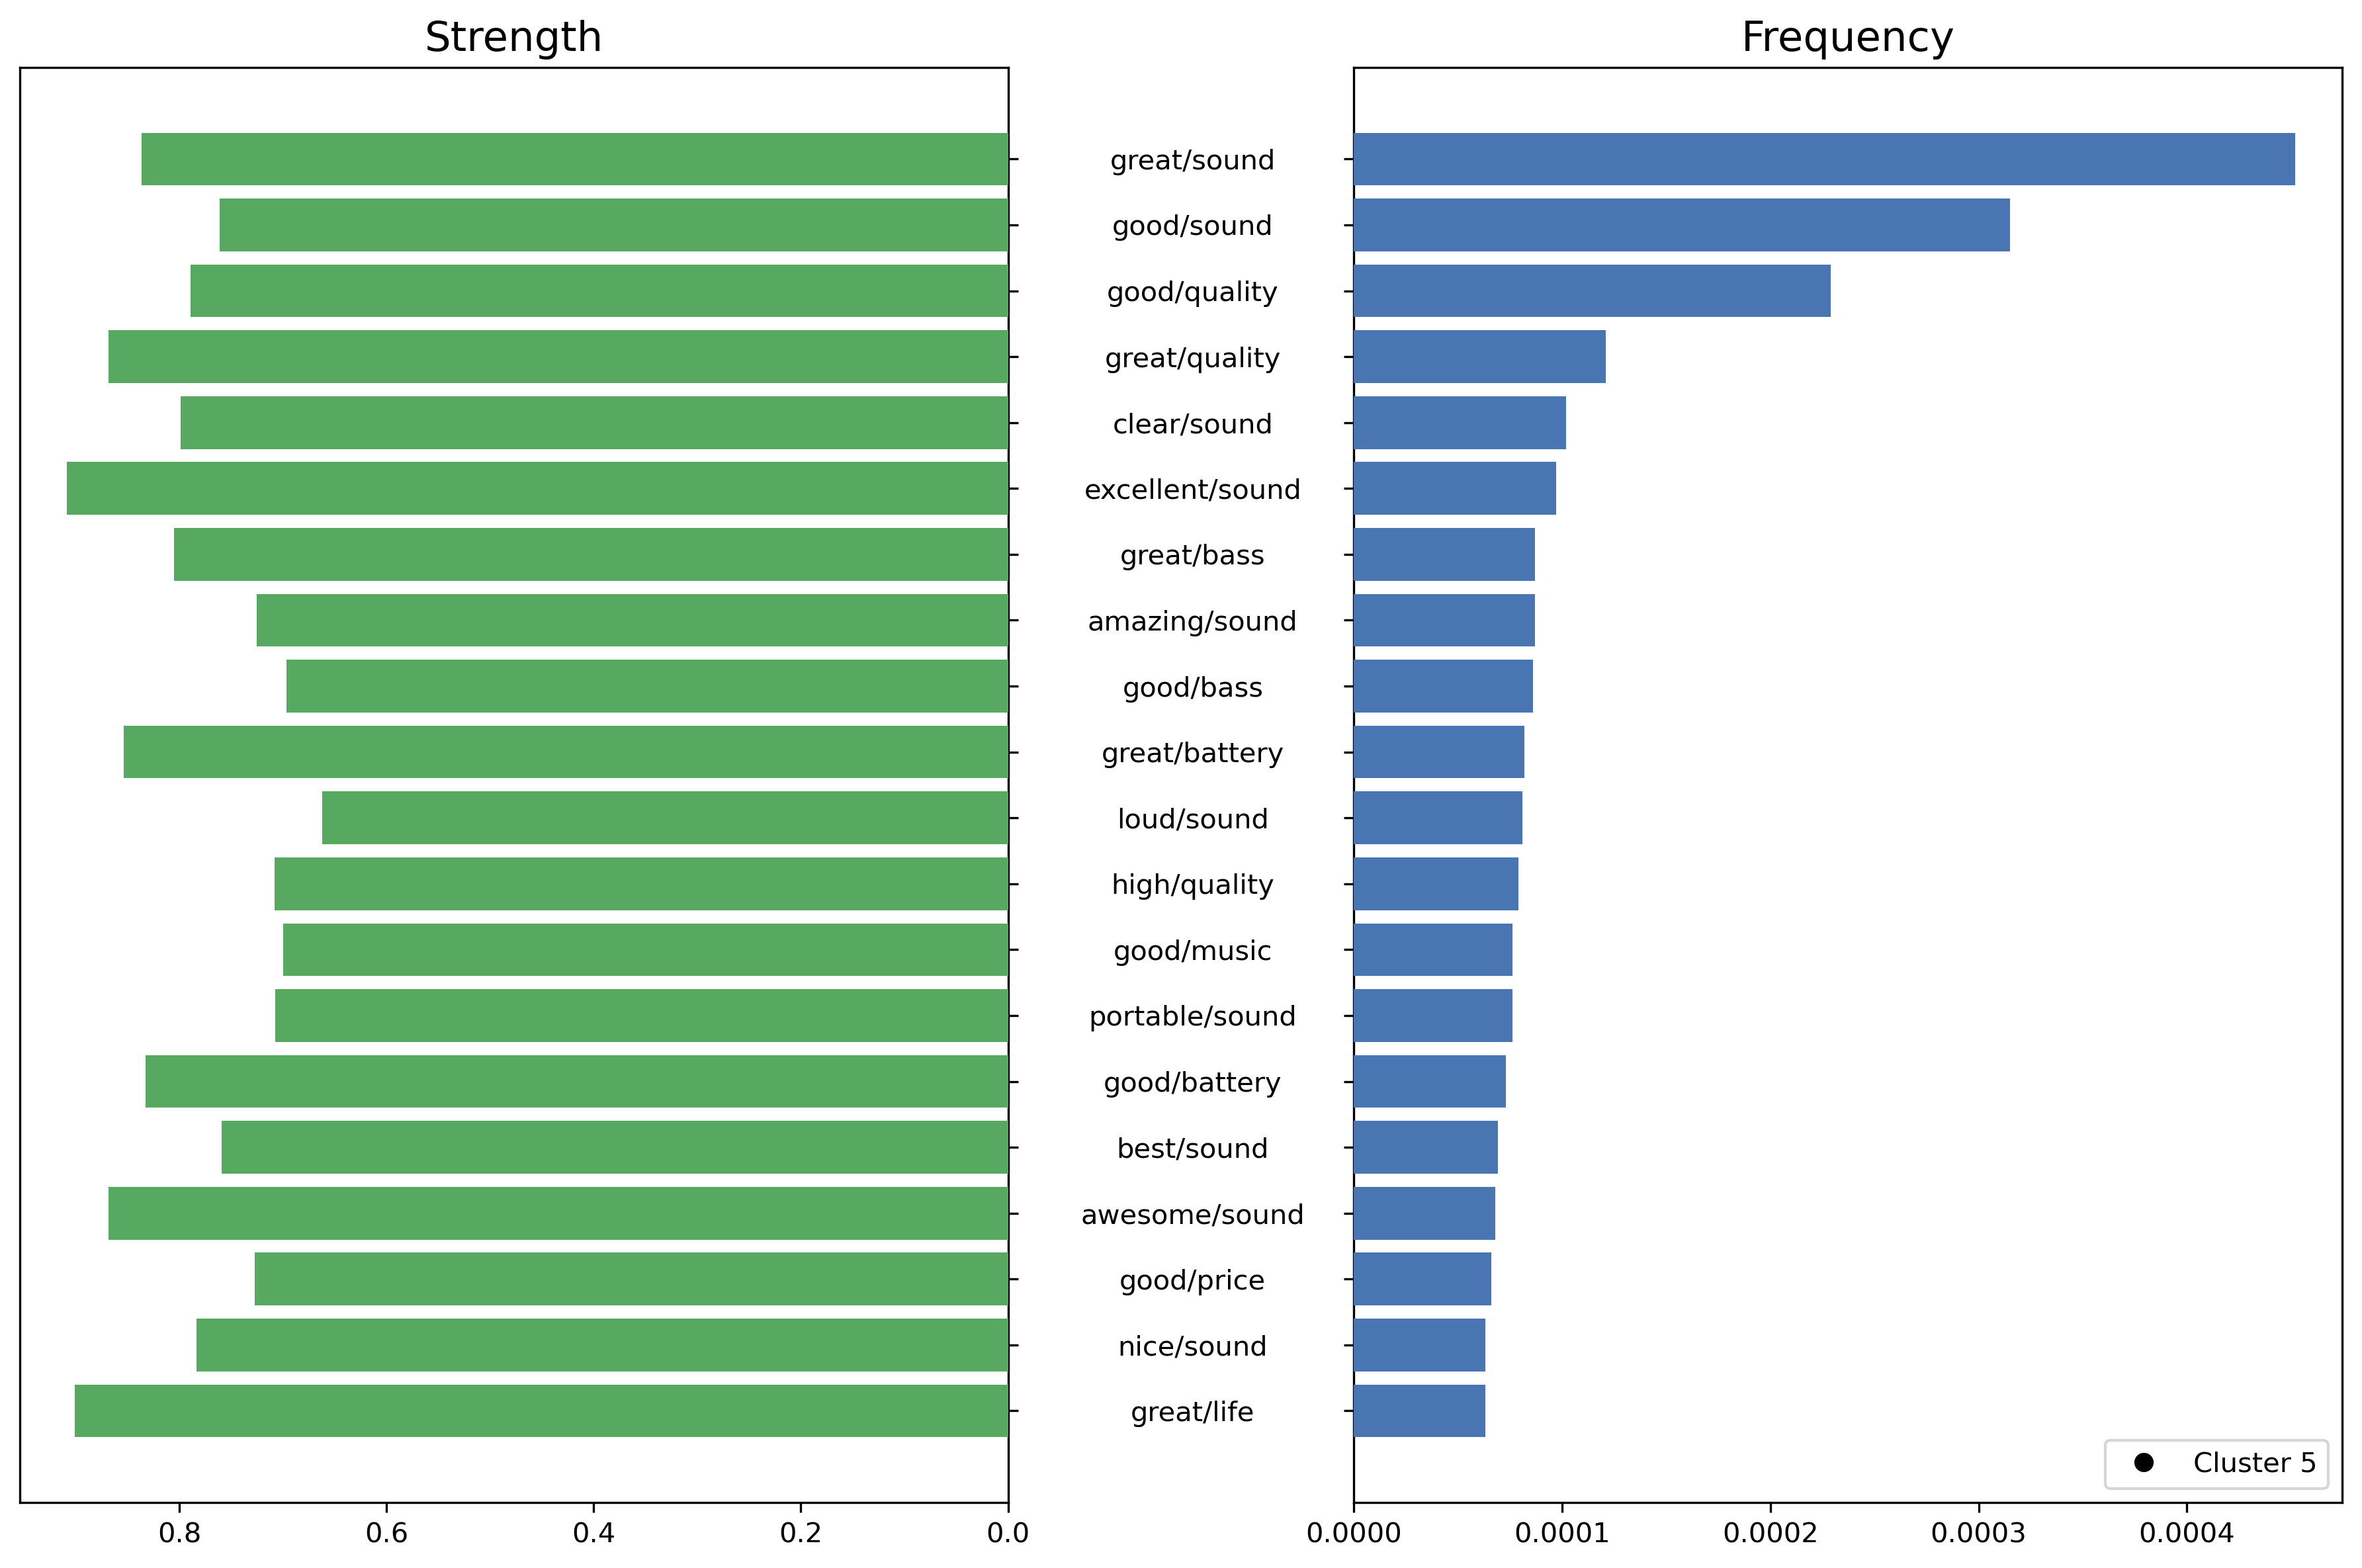

In [30]:
for i in range(0,5):
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,8), dpi=300)
    axes[0].barh(figs[i]['feature'], figs[i]['strength'], align='center', color='#57A861', zorder=10)
    axes[0].set_title('Strength', fontsize=15)
    axes[1].barh(figs[i]['feature'], figs[i]['frequency'], align='center', color='#4975B2', zorder=10)
    axes[1].set_title('Frequency', fontsize=15)
    
    axes[0].invert_xaxis()
    axes[0].yaxis.tick_right()
    axes[1].invert_yaxis()
    
    CL = Line2D([0], [0], marker='o', color='w', label='Cluster ' + str(i%5+1)
                , markerfacecolor='black', markersize=8)
    axes[1].legend(handles=[CL], loc=4)
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.35)
    plt.setp(axes[0].yaxis.get_majorticklabels(), ha='center')
    
    # Create offset transform by some points in x direction
    dx = 60 / 72.
    dy = 0 / 72.
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    
    # apply offset transform to all y ticklabels.
    for label in axes[0].yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)
        
    plt.savefig("fsp_p" + str(i+1) + ".png", format="png", dpi=300)    
    plt.show()

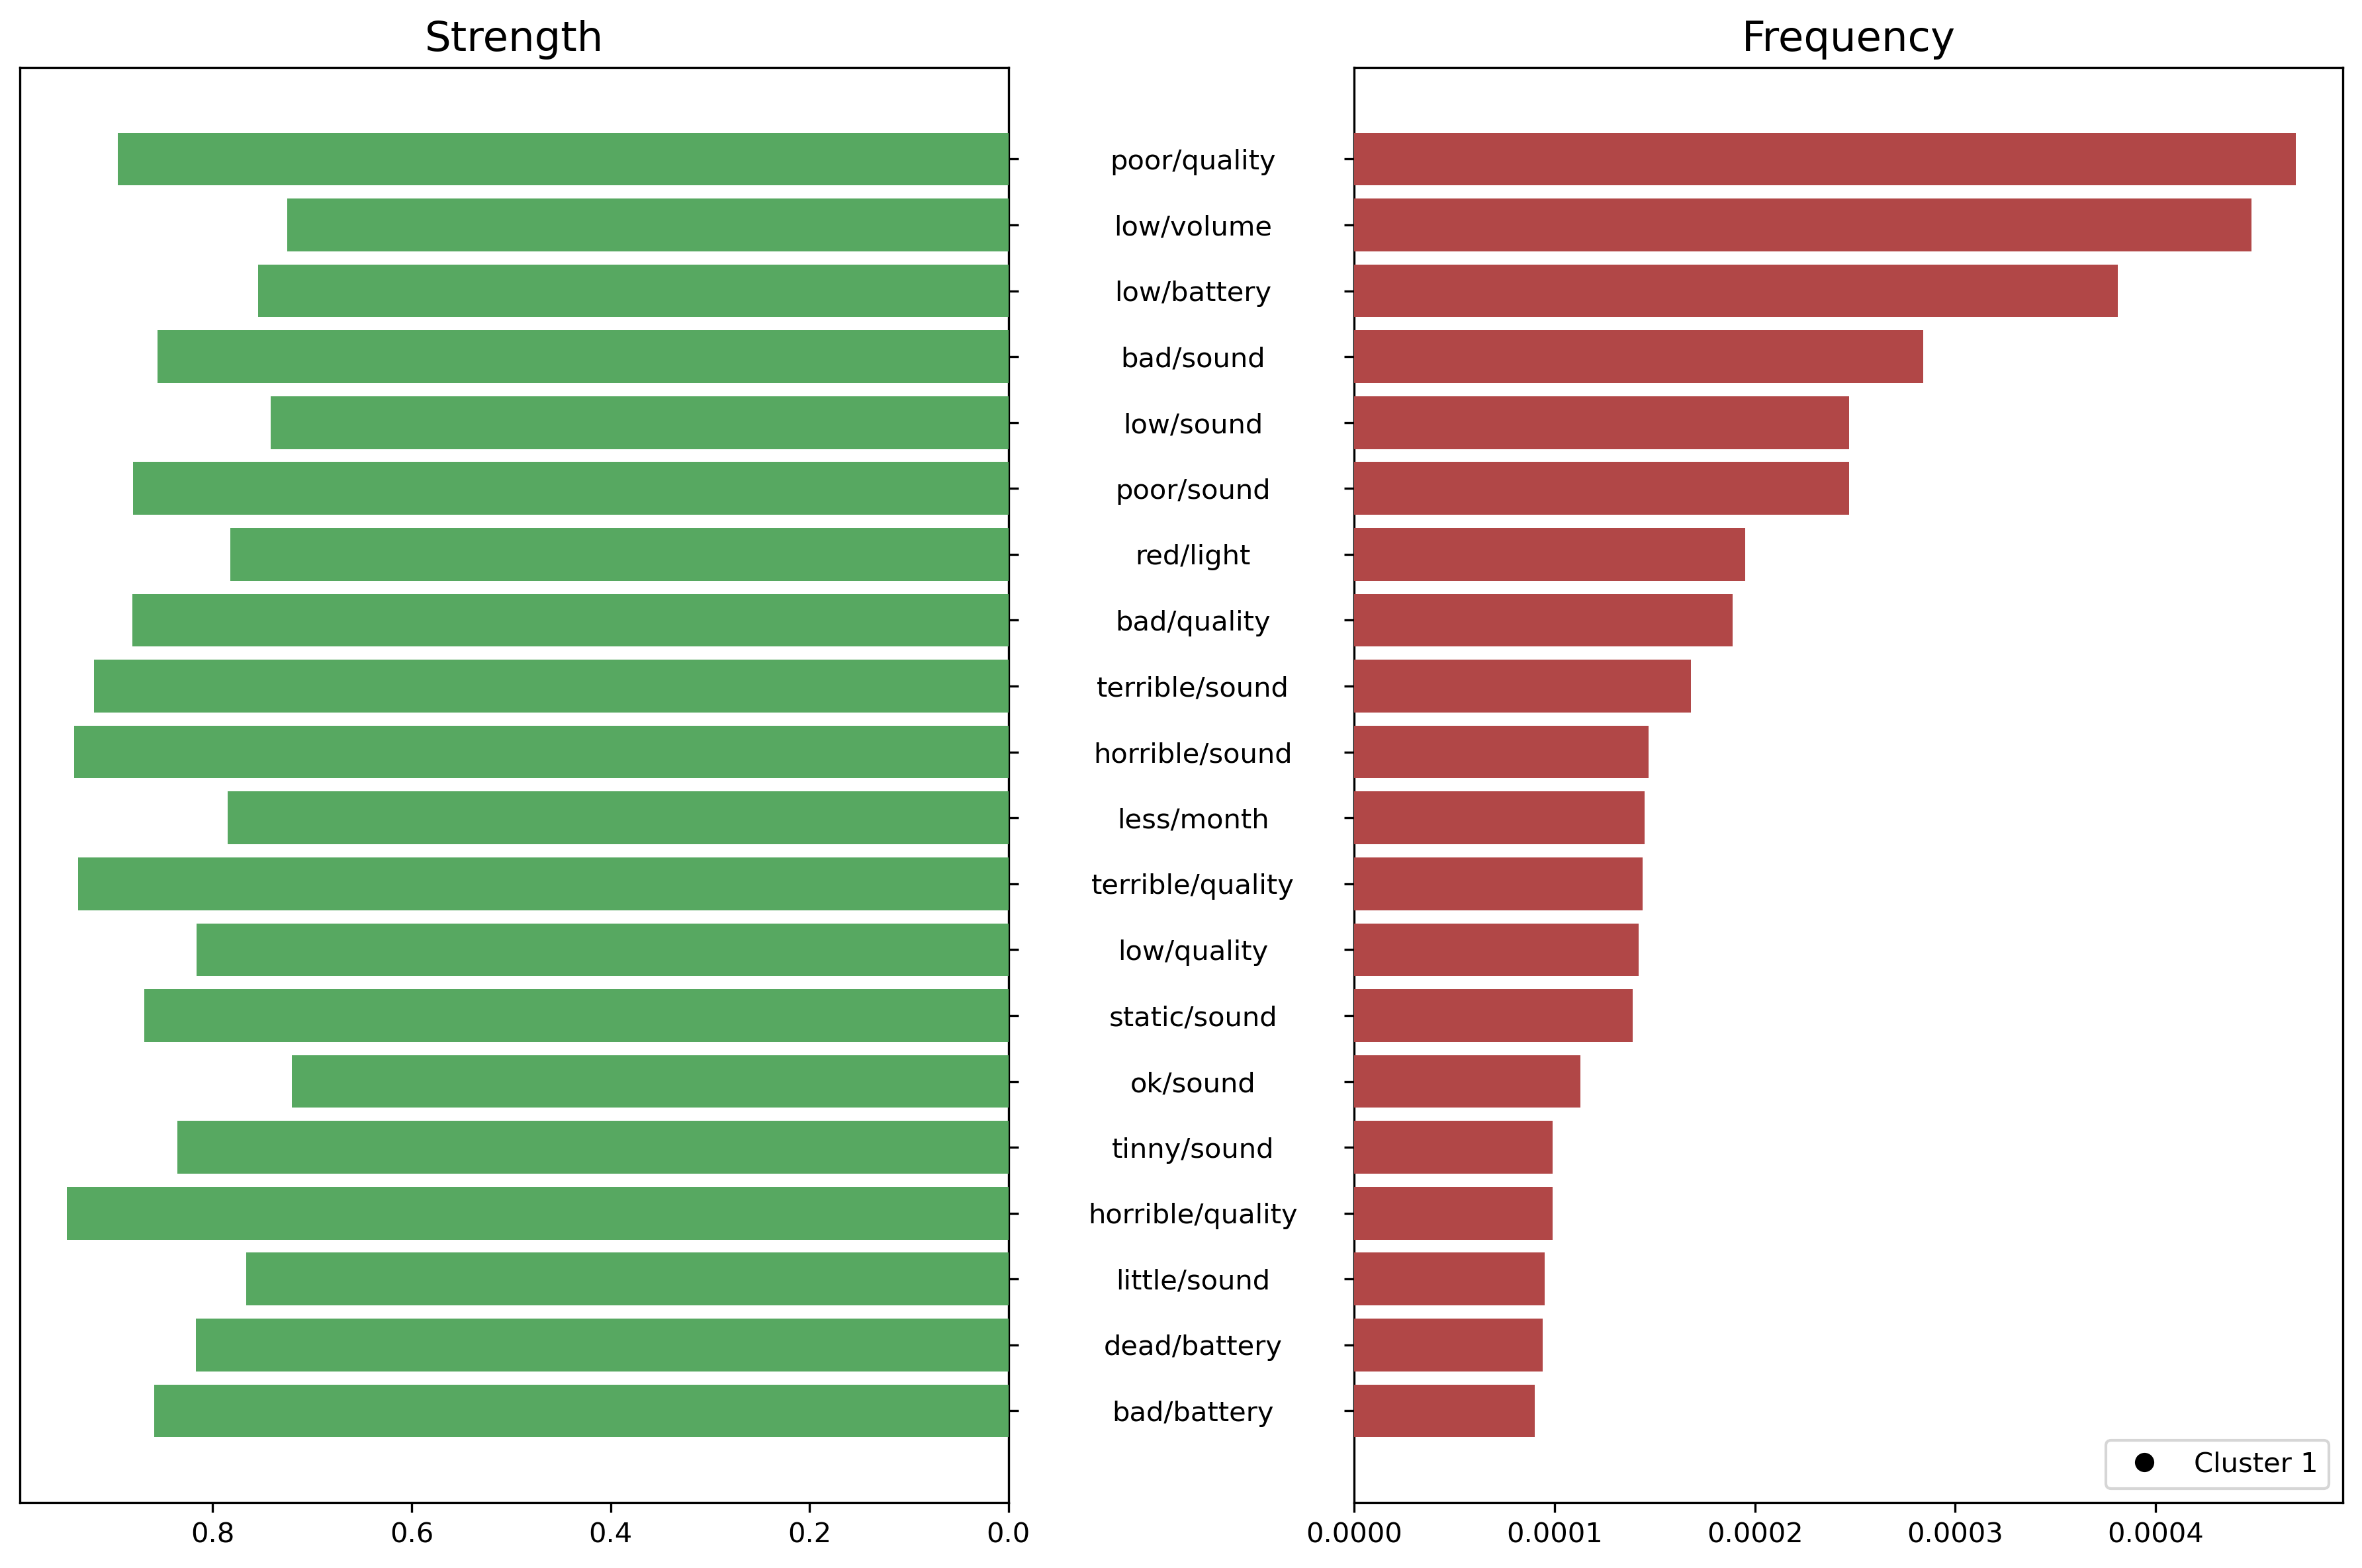

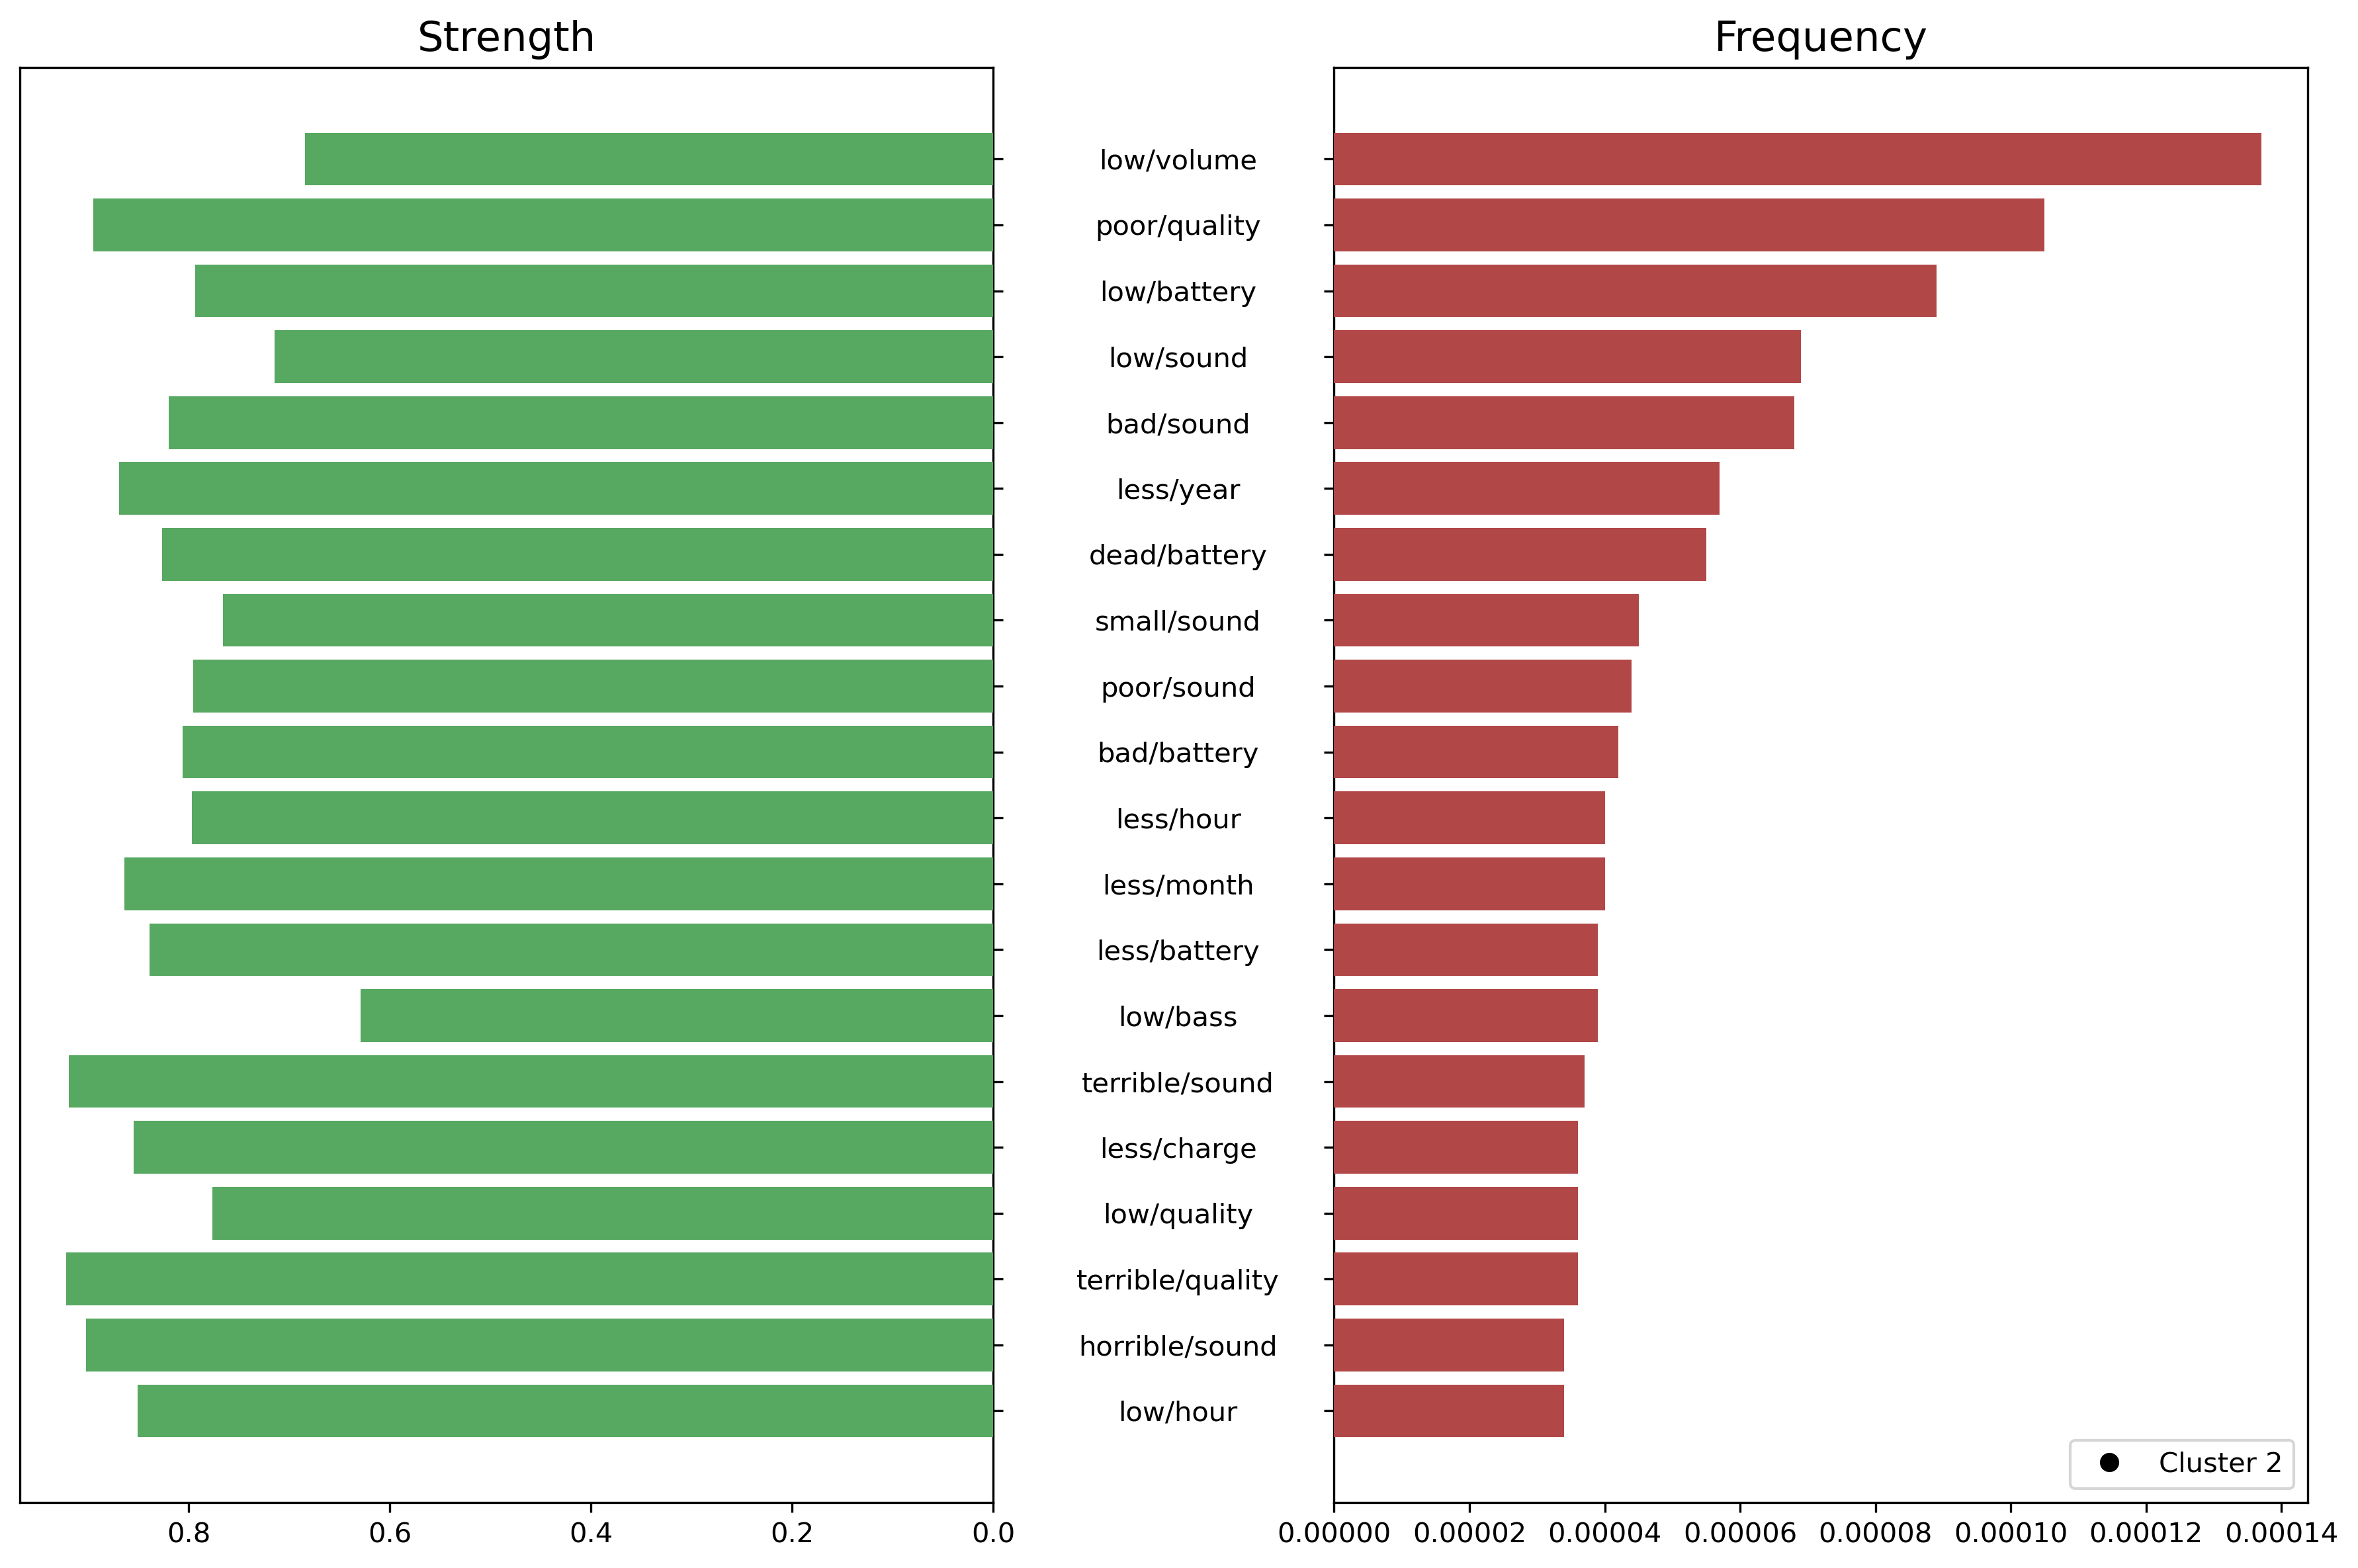

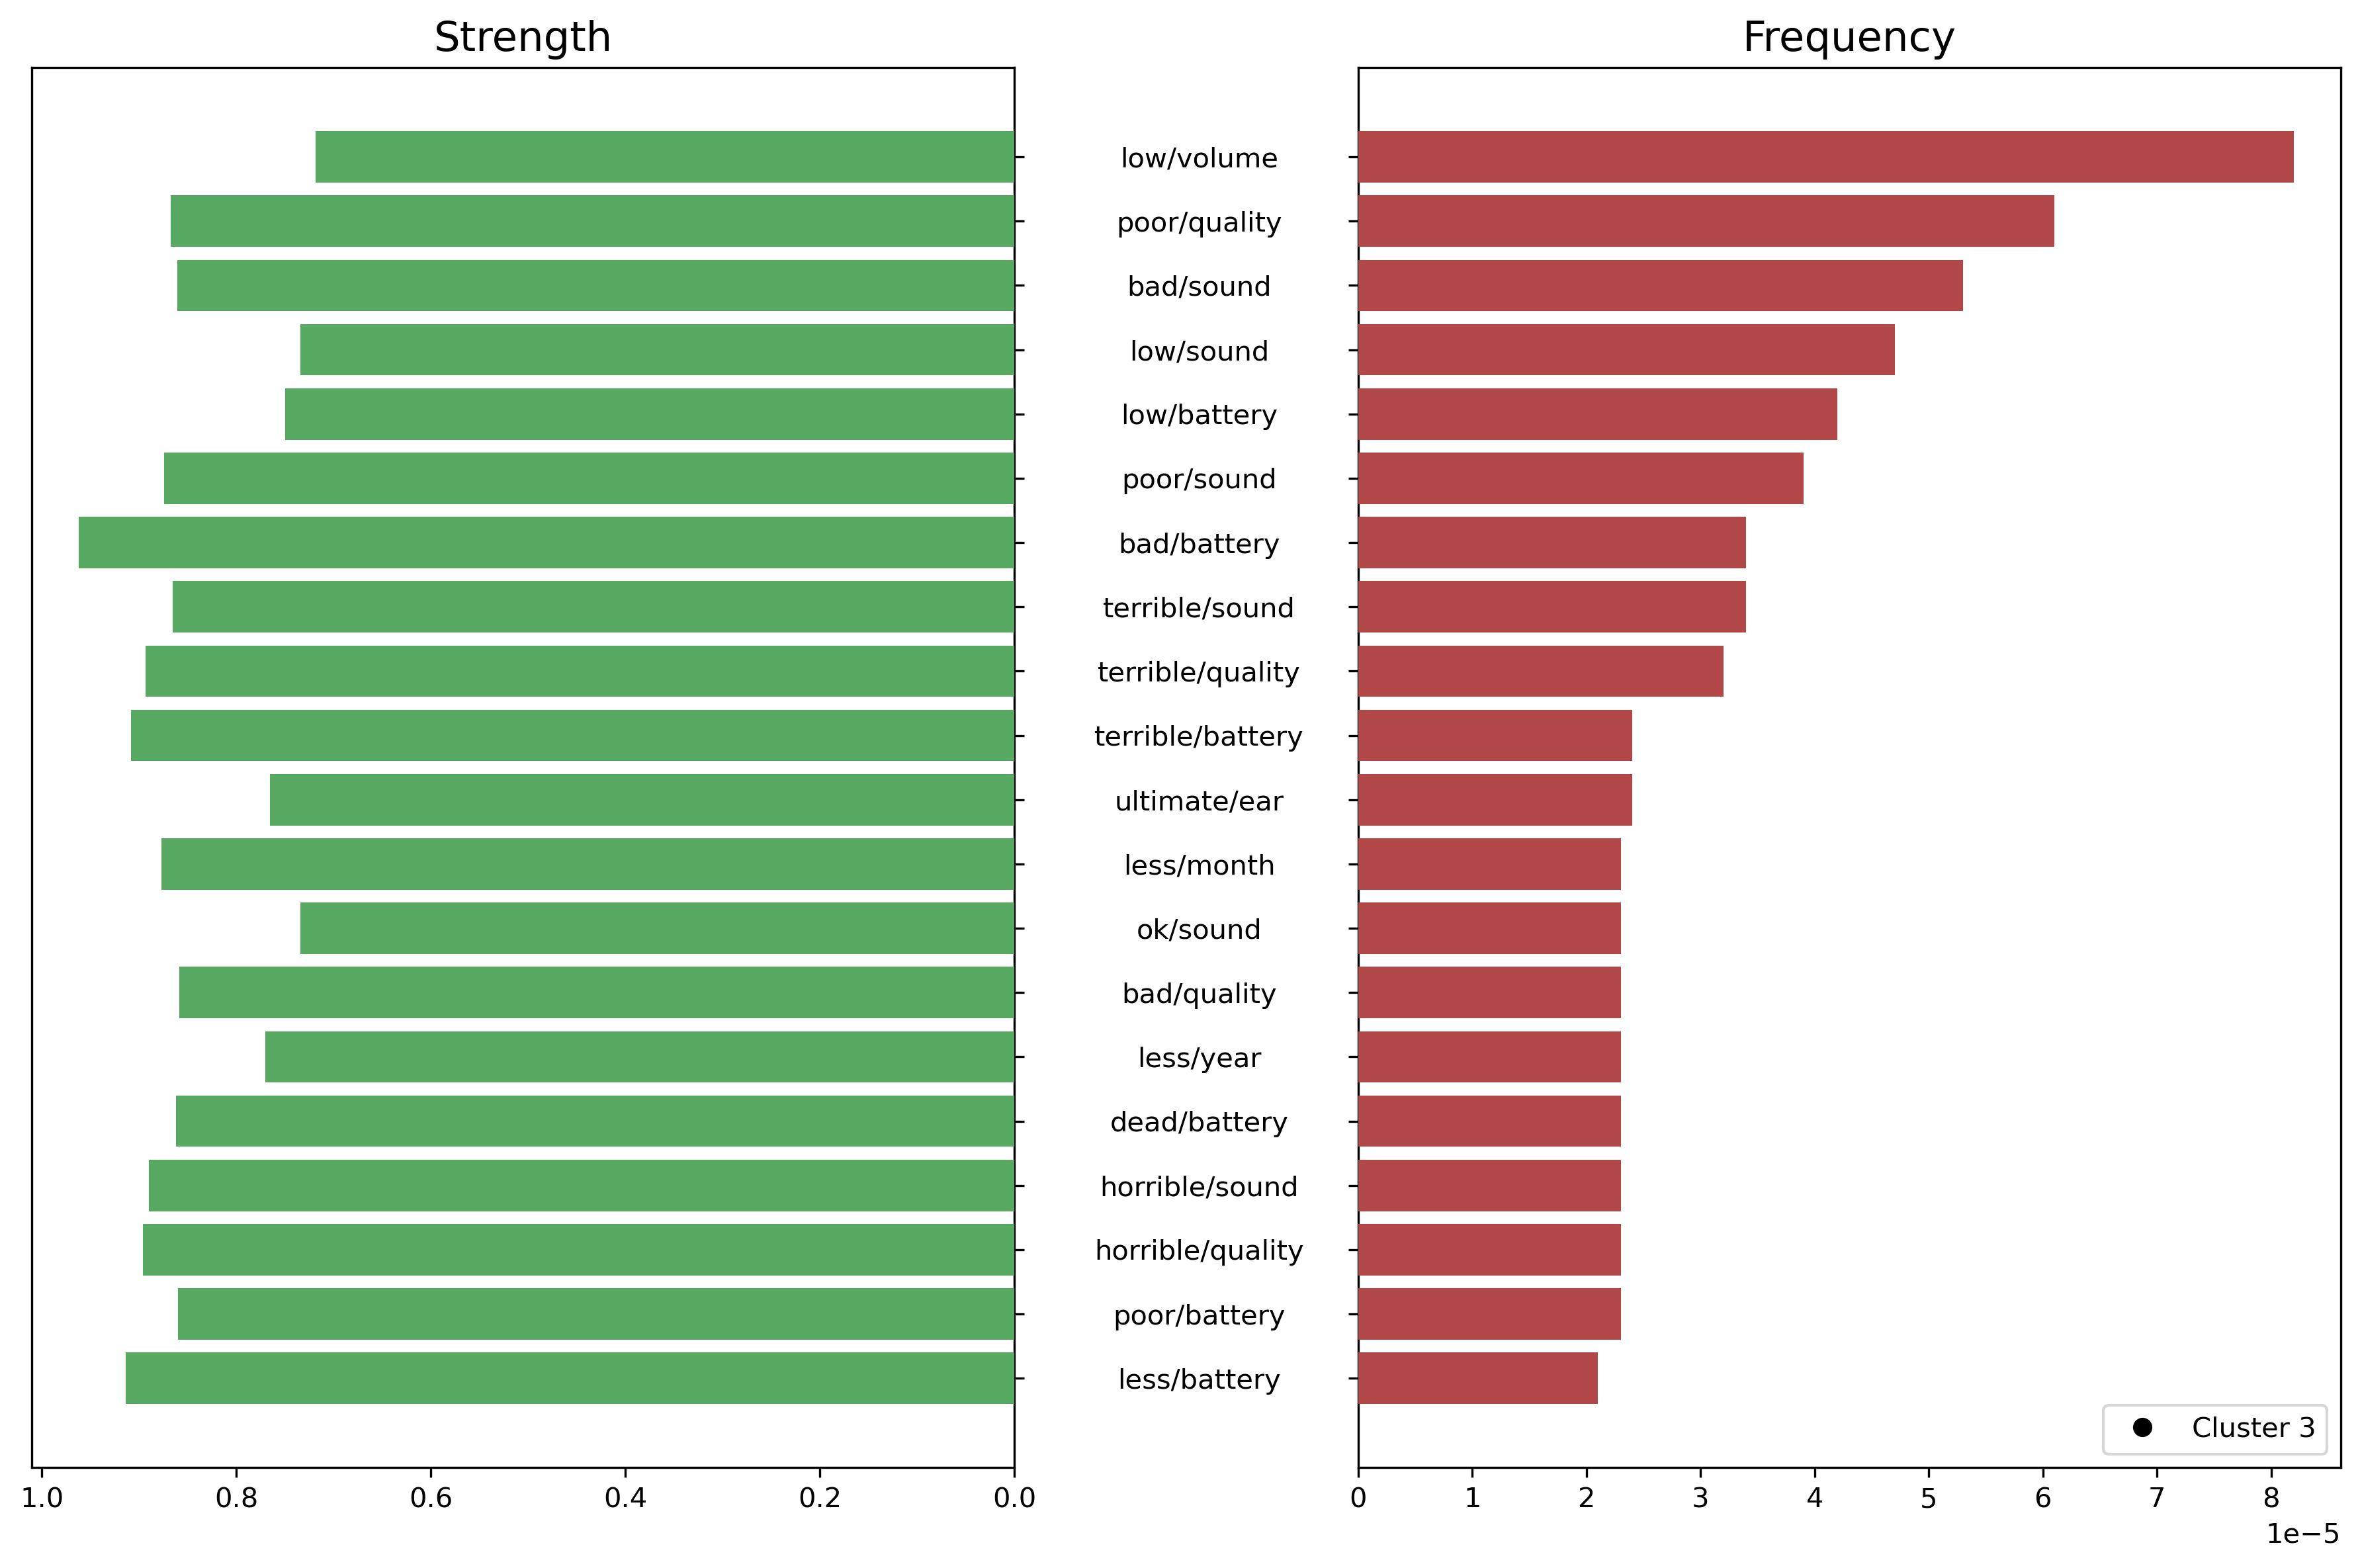

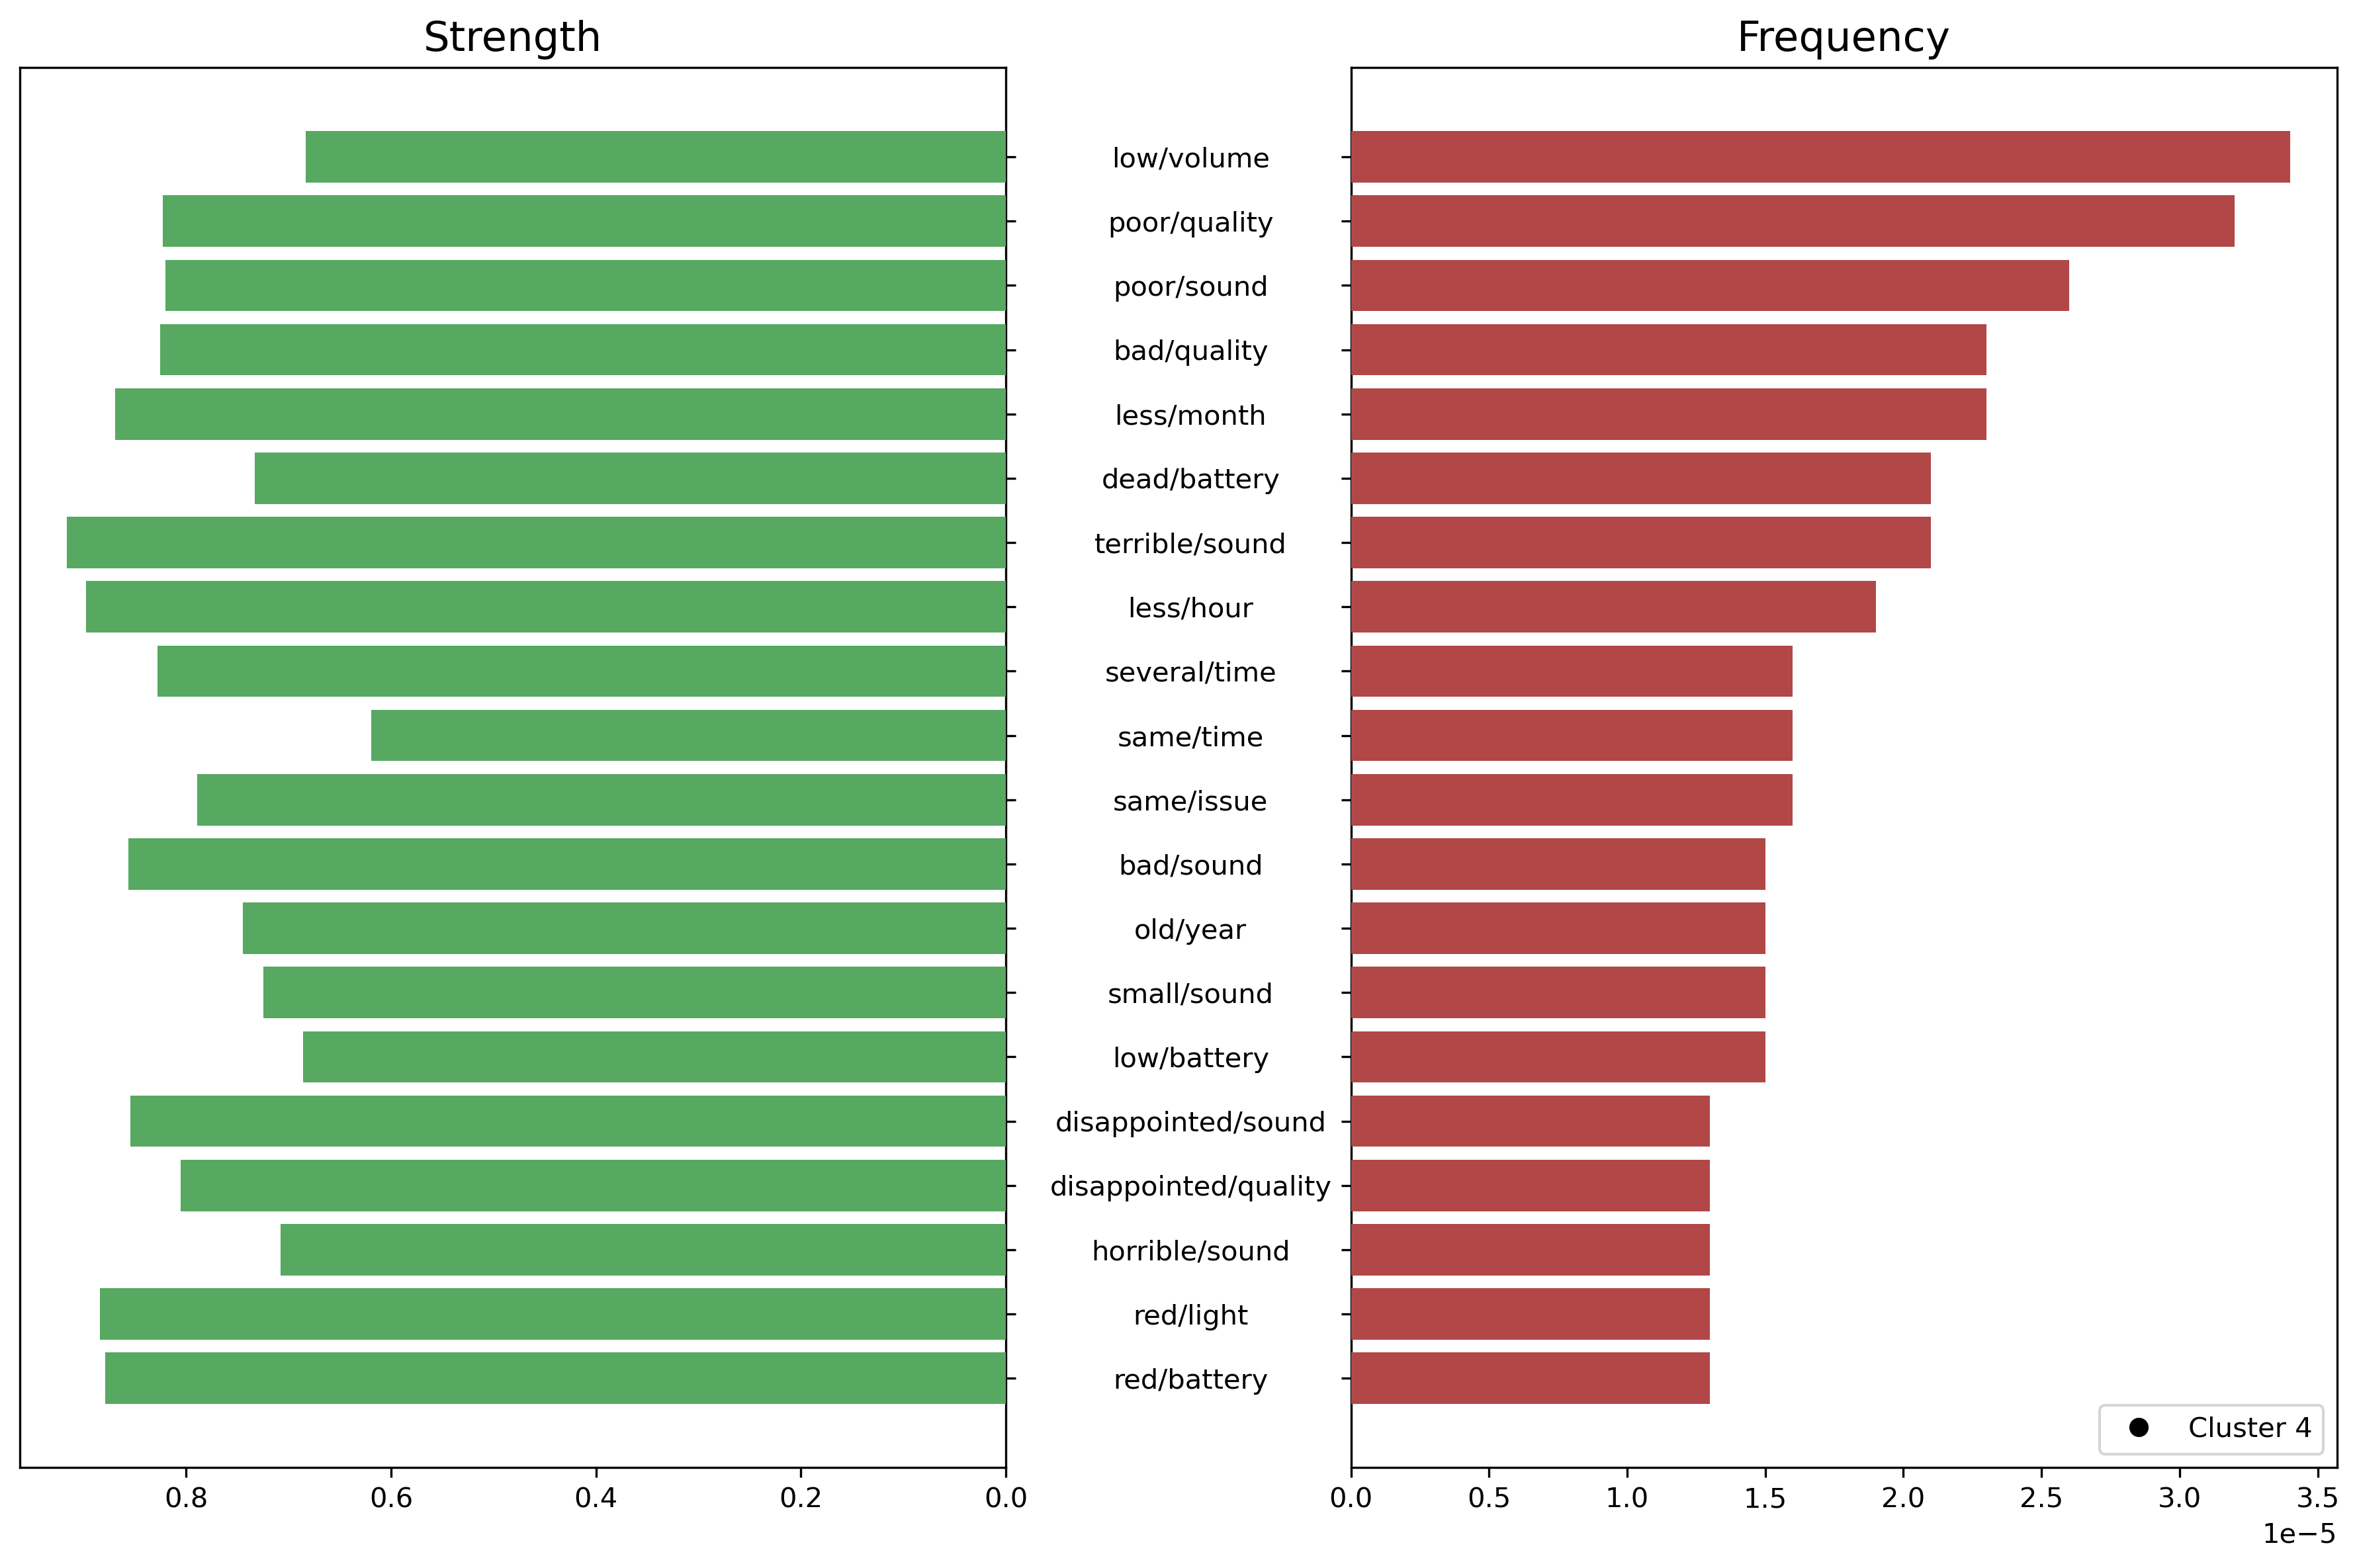

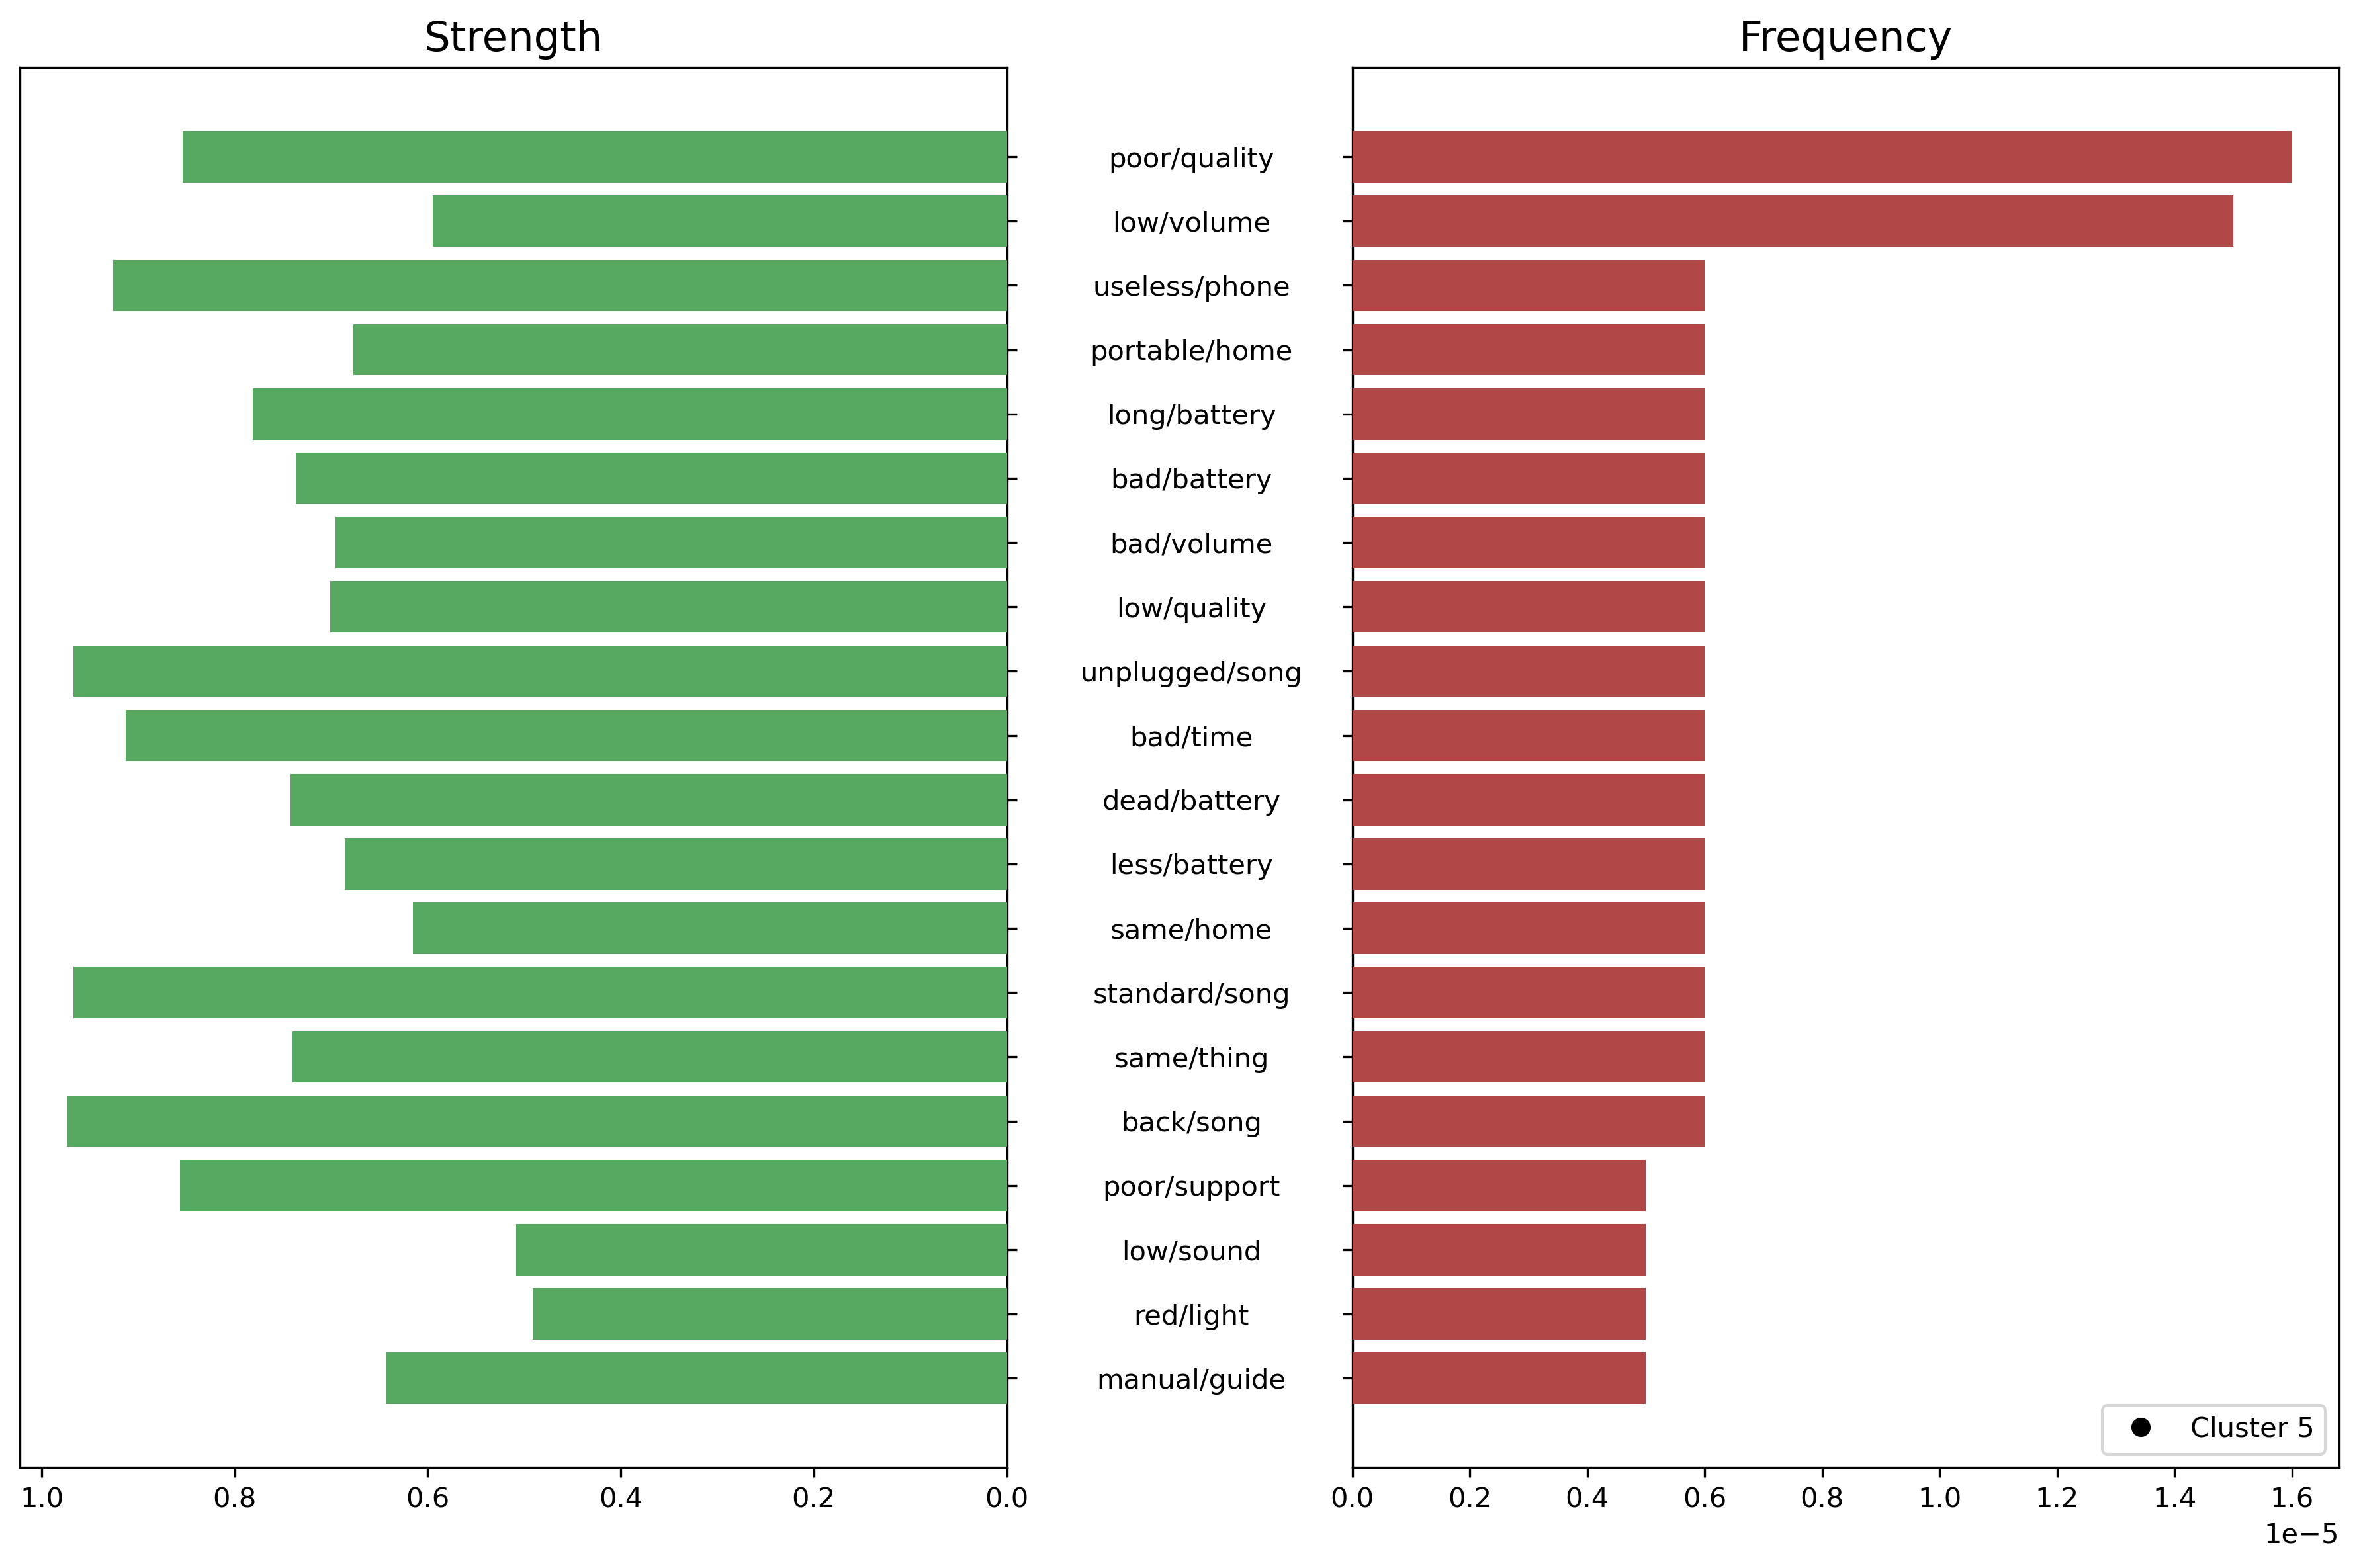

In [31]:
for i in range(5,10):
    fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,8), dpi=300)
    axes[0].barh(figs[i]['feature'], figs[i]['strength'], align='center', color='#57A861', zorder=10)
    axes[0].set_title('Strength', fontsize=15)
    axes[1].barh(figs[i]['feature'], figs[i]['frequency'], align='center', color='#B14747', zorder=10)
    axes[1].set_title('Frequency', fontsize=15)
    
    axes[0].invert_xaxis()
    axes[0].yaxis.tick_right()
    axes[1].invert_yaxis()
    
    CL = Line2D([0], [0], marker='o', color='w', label='Cluster ' + str(i%5+1)
                , markerfacecolor='black', markersize=8)
    axes[1].legend(handles=[CL], loc=4)
    
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.35)
    plt.setp(axes[0].yaxis.get_majorticklabels(), ha='center')
    
    # Create offset transform by some points in x direction
    dx = 60 / 72.
    dy = 0 / 72.
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    
    # apply offset transform to all y ticklabels.
    for label in axes[0].yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)
    
    plt.savefig("fsp_n" + str(i%5+1) + ".png", format="png", dpi=300)    
    plt.show()

# Table for comparation

### Frequency

In [32]:
df_pc1_fr = df_pc1_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]
df_pc2_fr = df_pc2_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]
df_pc3_fr = df_pc3_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]
df_pc4_fr = df_pc4_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]
df_pc5_fr = df_pc5_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]

df_nc1_fr = df_nc1_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]
df_nc2_fr = df_nc2_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]
df_nc3_fr = df_nc3_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]
df_nc4_fr = df_nc4_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]
df_nc5_fr = df_nc5_top.sort_values(by='frequency', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Frequency']]

In [33]:
df_fsp_p_fr = pd.concat([df_pc1_fr, df_pc2_fr, df_pc3_fr, df_pc4_fr, df_pc5_fr], axis=1)
df_fsp_n_fr = pd.concat([df_nc1_fr, df_nc2_fr, df_nc3_fr, df_nc4_fr, df_nc5_fr], axis=1)
df_fsp_fr = df_fsp_p_fr.append(df_fsp_n_fr)

In [34]:
df_fsp_fr.to_excel('fsp_fr.xlsx')

### Strength

In [35]:
df_pc1_st = df_pc1_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]
df_pc2_st = df_pc2_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]
df_pc3_st = df_pc3_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]
df_pc4_st = df_pc4_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]
df_pc5_st = df_pc5_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]

df_nc1_st = df_nc1_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]
df_nc2_st = df_nc2_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]
df_nc3_st = df_nc3_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]
df_nc4_st = df_nc4_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]
df_nc5_st = df_nc5_top.sort_values(by='strength', ascending=False).reset_index(drop=True).rename(columns= {'feature': 'Feature', 'frequency': 'Frequency', 'strength': 'Strength'})[['Feature', 'Strength']]

In [36]:
df_fsp_p_st = pd.concat([df_pc1_st, df_pc2_st, df_pc3_st, df_pc4_st, df_pc5_st], axis=1)
df_fsp_n_st = pd.concat([df_nc1_st, df_nc2_st, df_nc3_st, df_nc4_st, df_nc5_st], axis=1)
df_fsp_st = df_fsp_p_st.append(df_fsp_n_st)

In [37]:
df_fsp_st.to_excel('fsp_st.xlsx')

### FSS Distribution

1345584


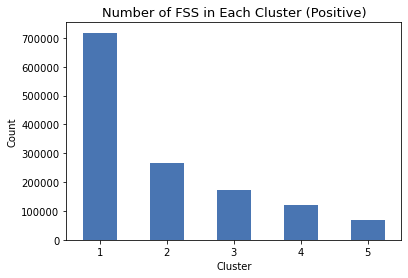

In [38]:
df_fsp_p2 = df_fsp_p
df_fsp_p2.loc[df_fsp_p2['cluster'] == 'c1', 'cluster'] = 1
df_fsp_p2.loc[df_fsp_p2['cluster'] == 'c2', 'cluster'] = 2
df_fsp_p2.loc[df_fsp_p2['cluster'] == 'c3', 'cluster'] = 3
df_fsp_p2.loc[df_fsp_p2['cluster'] == 'c4', 'cluster'] = 4
df_fsp_p2.loc[df_fsp_p2['cluster'] == 'c5', 'cluster'] = 5
print(len(df_fsp_p2))

plt.figure()
df_fsp_p2.groupby('cluster')['price'].count().plot(kind='bar', color='#4975B2')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Number of FSS in Each Cluster (Positive)', fontsize=13)
plt.savefig("count_p.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

225827


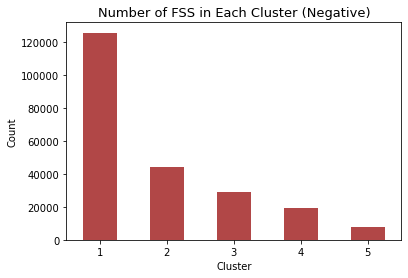

In [39]:
df_fsp_n2 = df_fsp_n
df_fsp_n2.loc[df_fsp_n2['cluster'] == 'c1', 'cluster'] = 1
df_fsp_n2.loc[df_fsp_n2['cluster'] == 'c2', 'cluster'] = 2
df_fsp_n2.loc[df_fsp_n2['cluster'] == 'c3', 'cluster'] = 3
df_fsp_n2.loc[df_fsp_n2['cluster'] == 'c4', 'cluster'] = 4
df_fsp_n2.loc[df_fsp_n2['cluster'] == 'c5', 'cluster'] = 5
print(len(df_fsp_n2))

plt.figure()
df_fsp_n2.groupby('cluster')['price'].count().plot(kind='bar', color='#B14747')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Number of FSS in Each Cluster (Negative)', fontsize=13)
plt.savefig("count_n.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

### Alternative figures

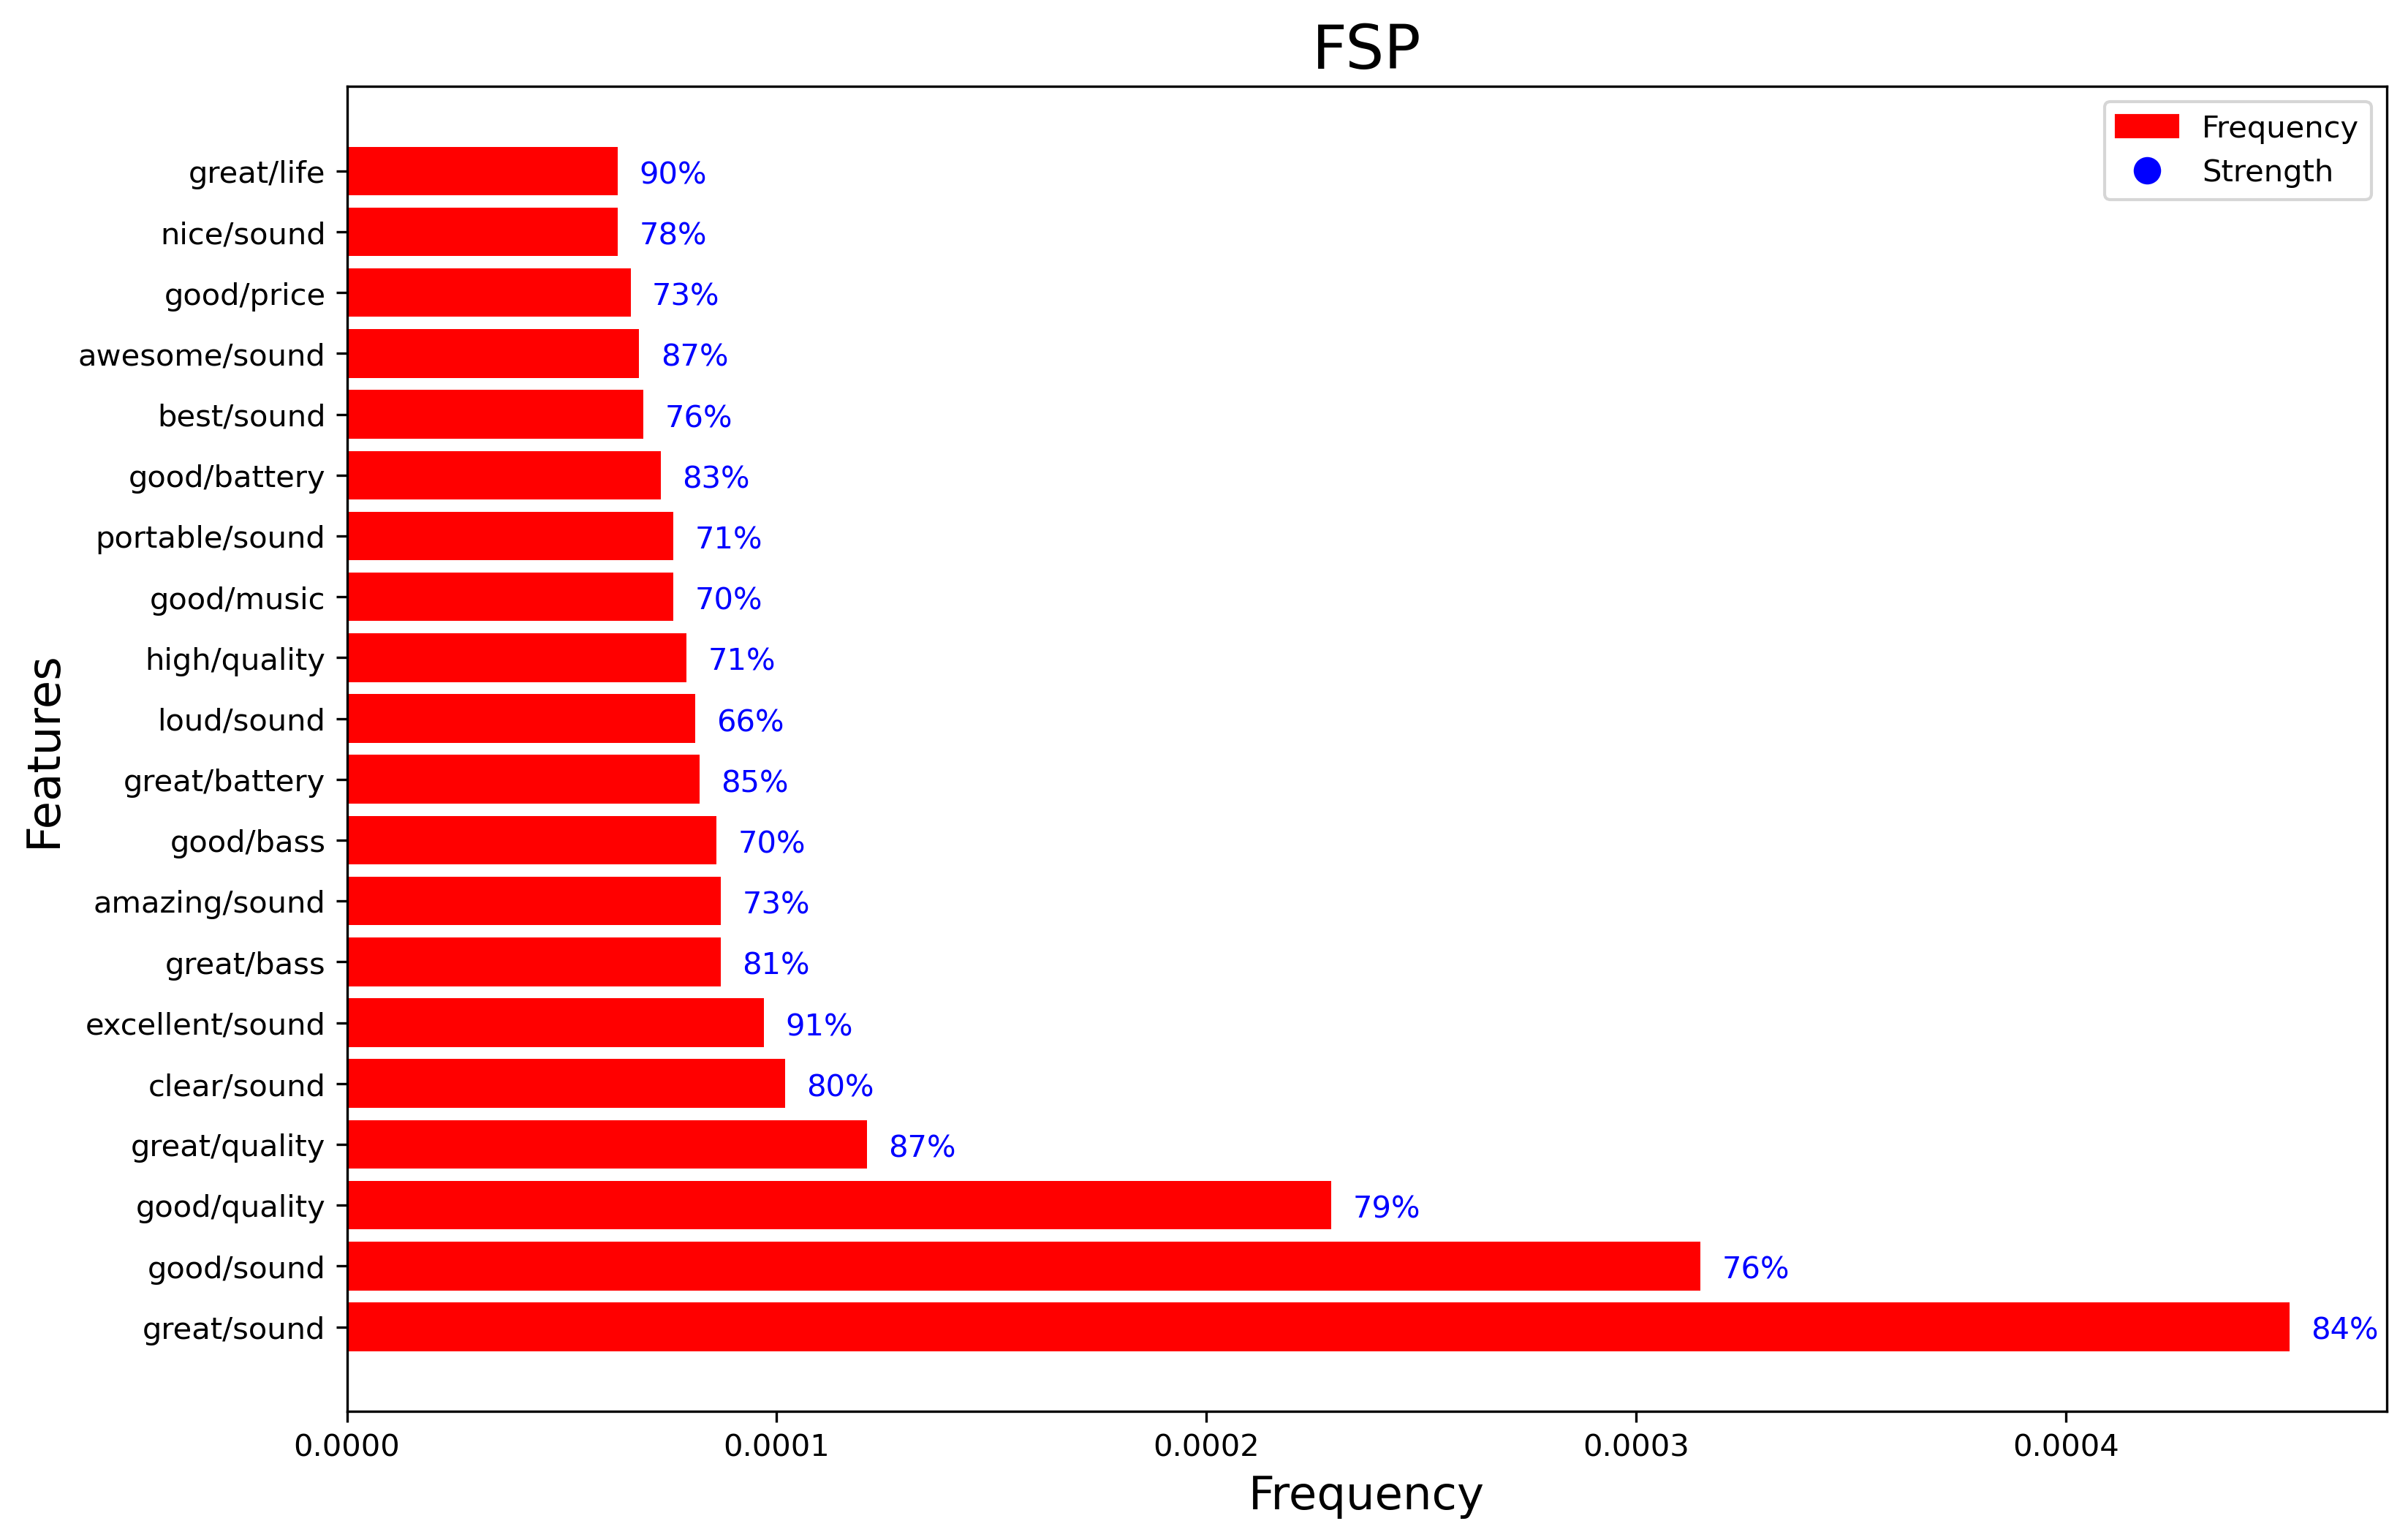

In [40]:
fig, ax = plt.subplots(figsize=(12,8), dpi=300)

bar_x = df_pc5_top['feature'].tolist()
bar_y = df_pc5_top['frequency'].tolist()
bar_label = [str(round(x*100))+"%" for x in df_pc5_top['strength'].tolist()]

bar_plot = plt.barh(bar_x, bar_y, color='r')
ax.set_xlabel('Frequency', fontsize = 15)
ax.set_ylabel('Features', fontsize = 15)
ax.set_title('FSP', fontsize = 20)

FQ = mpatches.Patch(color='r', label='Frequency')
ST = Line2D([0], [0], marker='o', color='w', label='Strength', markerfacecolor='b', markersize=10)
ax.legend(handles=[FQ,ST])

def autolabel(rects):
    for idx, rect in enumerate(bar_plot):
        width = rect.get_width()
        ax.text(rect.get_width()+0.000005, rect.get_y()+rect.get_height()-0.6, bar_label[idx], color='b')
autolabel(bar_plot)

plt.show()

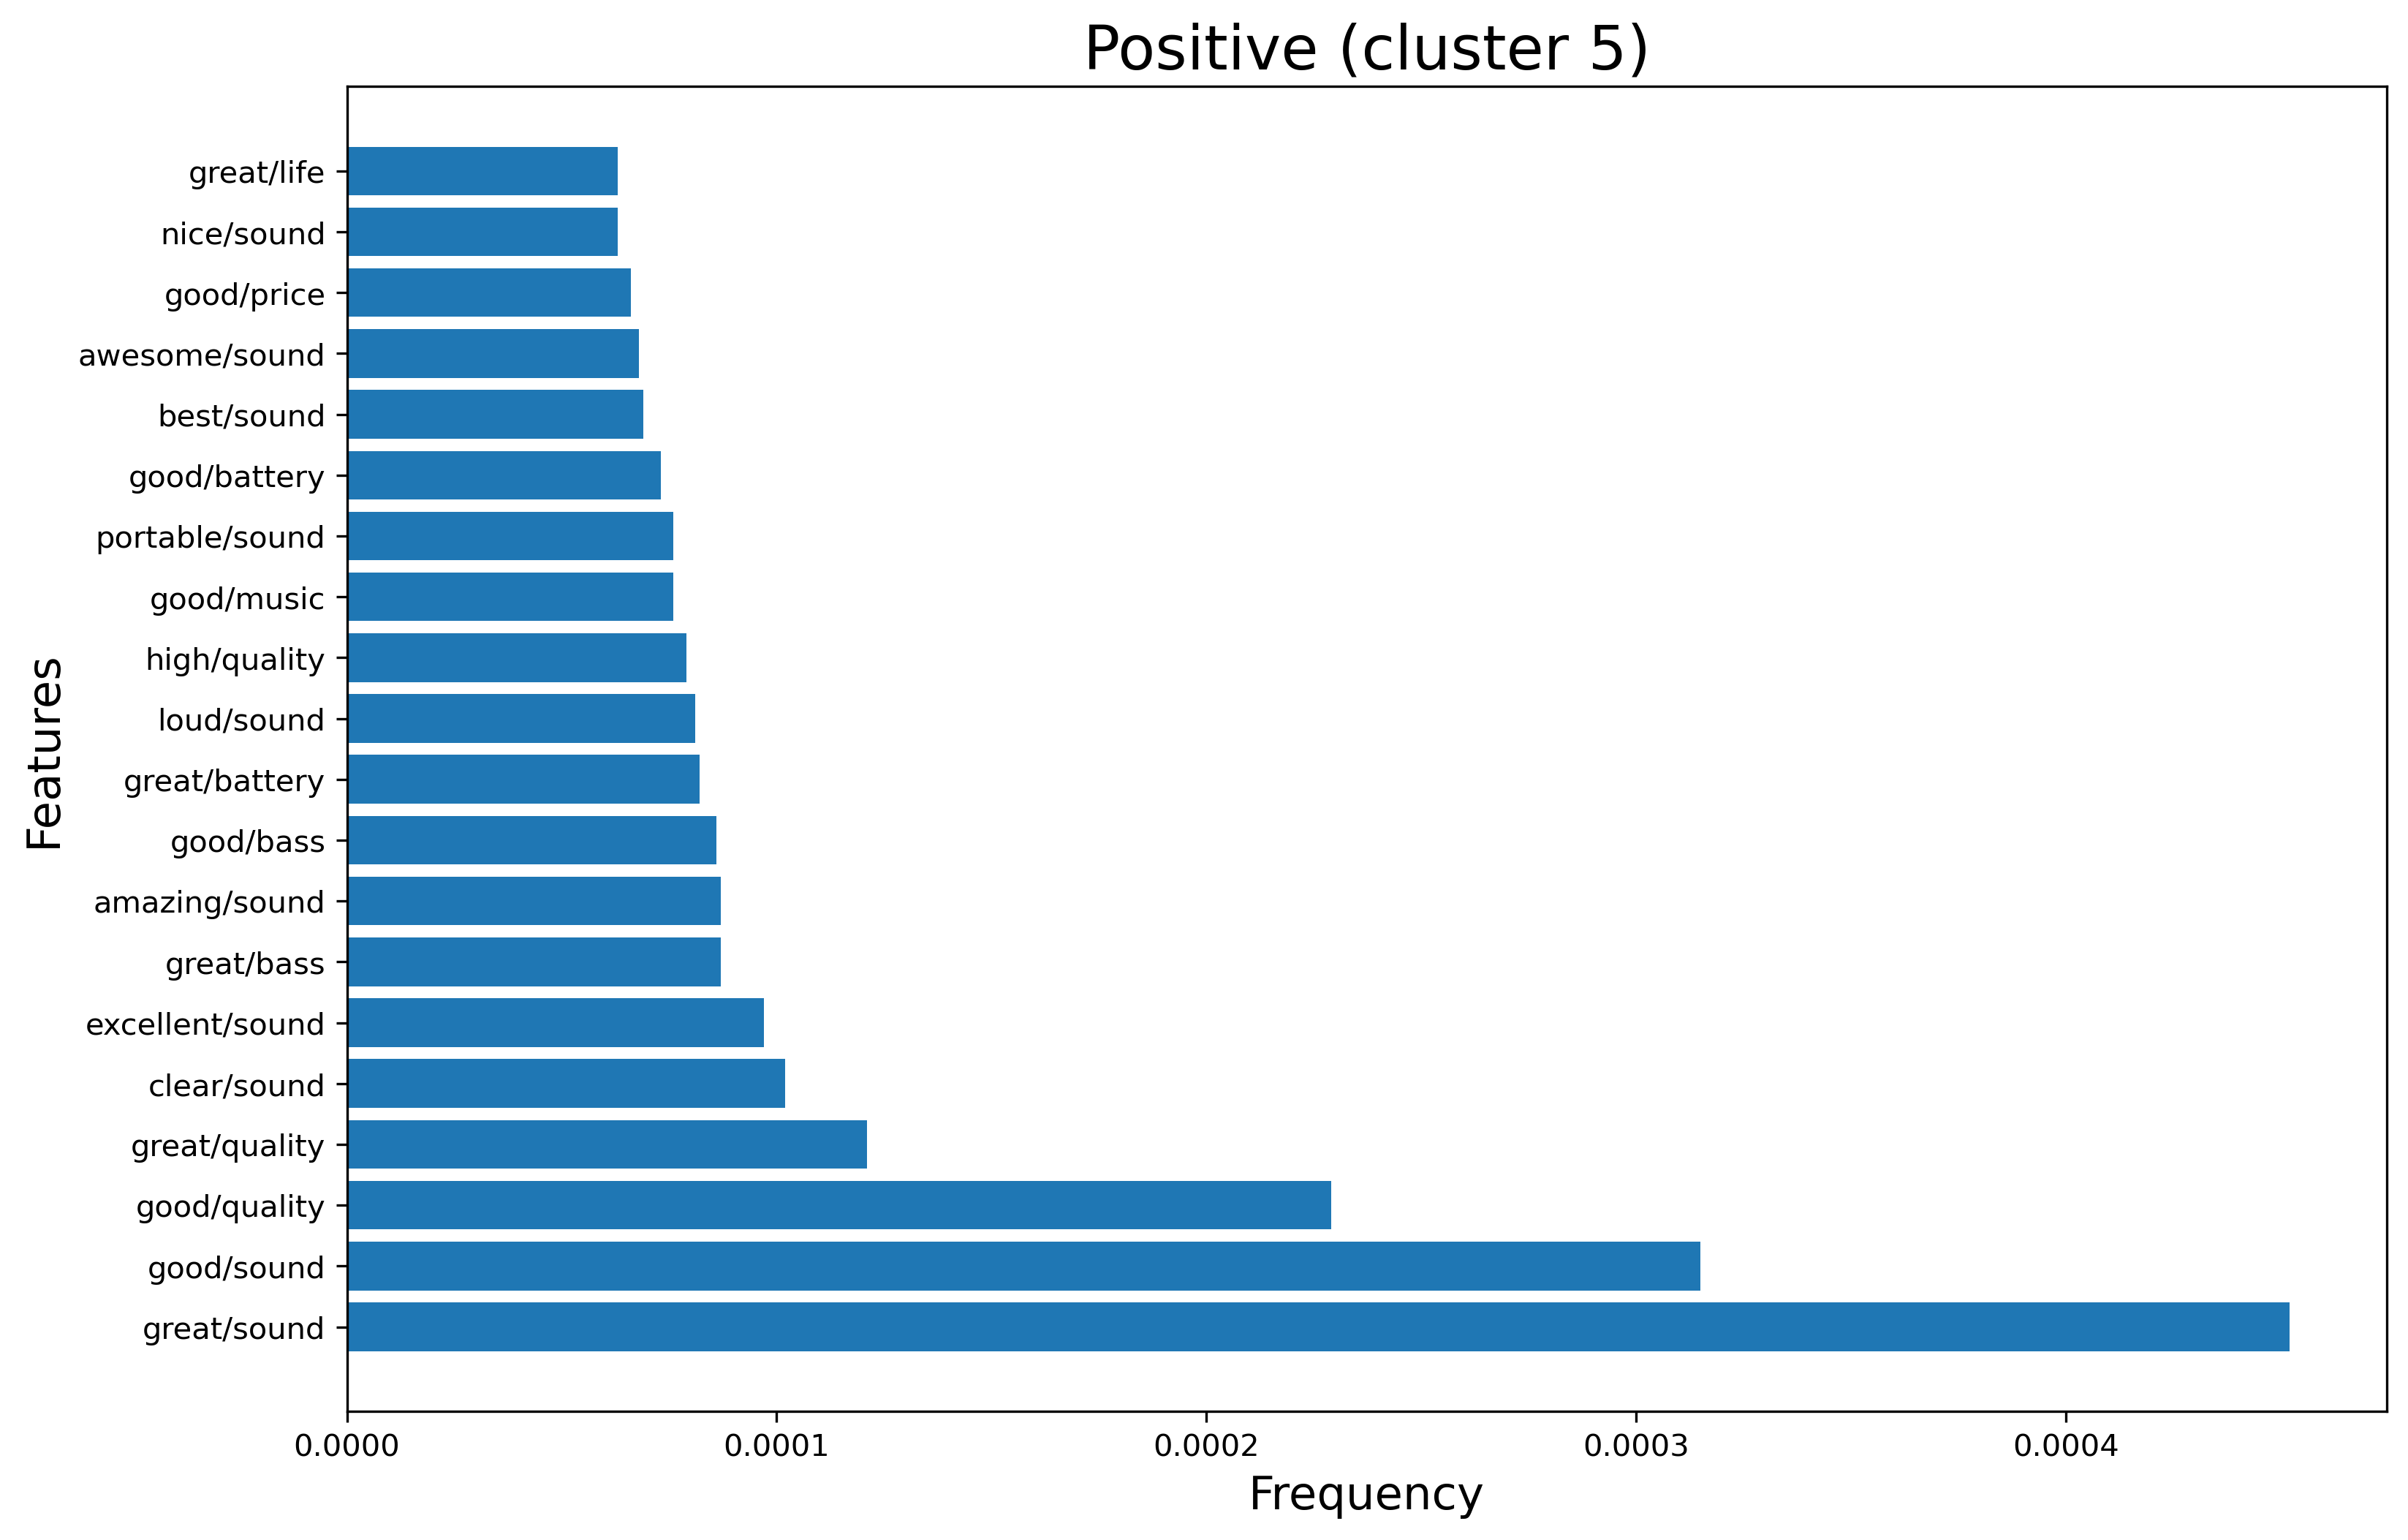

In [41]:
plt.figure(figsize=(12,8), dpi=300)
plt.barh(df_pc5_top['feature'], df_pc5_top['frequency'])

plt.xlabel('Frequency', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title('Positive (cluster 5)', fontsize = 20)

plt.show()